In [539]:
import pandas as pd
import numpy as np

In [540]:
Prices_raw= pd.read_csv('../data/Prices.csv', encoding='utf-8',thousands=',')
Export_Import_raw = pd.read_csv('../data/Cross_Border.csv',encoding='utf-8',thousands=',')
Consumption_raw = pd.read_csv('../data/Cosumption.csv',encoding='utf-8',thousands=',')
Generation_raw = pd.read_csv('../data/Generation.csv',encoding='utf-8',thousands=',')

In [541]:
Prices_raw['Start'] = Prices_raw['Unnamed: 0']
Consumption_raw['Start'] = Consumption_raw['Unnamed: 0']
Generation_raw['Start'] = Generation_raw['Unnamed: 0']
Export_Import_raw['Start'] = Export_Import_raw['Unnamed: 0']

In [542]:
Prices_raw['Start'] = pd.to_datetime(Prices_raw['Start'])
Prices_raw = Prices_raw.set_index('Start')
Export_Import_raw['Start'] = pd.to_datetime(Export_Import_raw['Start'])
Export_Import_raw = Export_Import_raw.set_index('Start')
Consumption_raw['Start'] = pd.to_datetime(Consumption_raw['Start'])
Consumption_raw = Consumption_raw.set_index('Start')
Generation_raw['Start'] = pd.to_datetime(Generation_raw['Start'])
Generation_raw = Generation_raw.set_index('Start')

In [543]:
Generation_raw.rename(inplace= True, columns={
    'Biomass [MWh] Original resolutions':'Biomass',
       'Hydropower [MWh] Original resolutions':'Hydropower',
       'Wind offshore [MWh] Original resolutions':'Wind_offshore',
       'Wind onshore [MWh] Original resolutions':'Wind_onshore',
       'Photovoltaics [MWh] Original resolutions':'Photovoltaics',
       'Other renewable [MWh] Original resolutions':'Other_renewable',
       'Nuclear [MWh] Original resolutions':'Nuclear',
       'Lignite [MWh] Original resolutions':'Lignite',
       'Hard coal [MWh] Original resolutions':'Hard_coal',
       'Fossil gas [MWh] Original resolutions':'Fossil_gas',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro_pumped_storage',
       'Other conventional [MWh] Original resolutions':'Other_conventional',
         'Sum [MWh]':'Generation_sum'
})



In [544]:
Consumption_raw.rename(inplace=True, columns={
    'Total (grid load) [MWh] Original resolutions':'Total_sum',
       'Residual load [MWh] Original resolutions':'Residual',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro'
})


In [545]:
Prices_raw.rename(inplace=True, columns={
    'Germany/Luxembourg [€/MWh] Calculated resolutions':'Germany_Luxembourg',
       'Belgium [€/MWh] Calculated resolutions':'Belgium',
       'France [€/MWh] Calculated resolutions':'France',
       'Austria [€/MWh] Calculated resolutions':'Austria',
       'Poland [€/MWh] Calculated resolutions':'Poland',
       'Czech Republic [€/MWh] Calculated resolutions':'Czech_Republic',
       'Switzerland [€/MWh] Calculated resolutions':'Switzerland',
})

In [550]:
countries = ['Belgium', 'France', 'Poland', 'Austria', 'Czech Republic', 'Switzerland']
all_contries = countries + ['Netherlands', 'Denmark', 'Luxembourg', 'Sweden', 'Norway']

Export_Import_raw['Export_sum'] = 0
Export_Import_raw['Import_sum'] = 0

for country in countries:
    export_col = f'{country} (export) [MWh] Original resolutions'
    import_col = f'{country} (import) [MWh] Original resolutions'
    sum_col = f'{country.replace(" ", "_")}_sum'
    Export_Import_raw[sum_col] = Export_Import_raw[export_col] + Export_Import_raw[import_col]



for contries in all_contries:
    export_cols = f'{contries} (export) [MWh] Original resolutions'
    import_cols = f'{contries} (import) [MWh] Original resolutions'

    Export_Import_raw['Export_sum'] += Export_Import_raw[export_cols]
    Export_Import_raw['Import_sum'] += Export_Import_raw[import_cols]

# Calculate the remainder sum
export_import_sums = [f'{country.replace(" ", "_")}_sum' for country in countries]
Export_Import_raw['Remainder_sum'] = Export_Import_raw['Sum [MWh]'] - Export_Import_raw[export_import_sums].sum(axis=1)


In [552]:
Export_Import_raw.rename(inplace=True, columns={
    'Sum [MWh]':'Export_Import_sum'
})

Drop the other columns: 


In [553]:
Generation = Generation_raw.drop(columns=['Unnamed: 0','End date'])
Consumption = Consumption_raw.drop(columns= ['Unnamed: 0','End date'])
Prices = Prices_raw.drop(columns=
        ['Unnamed: 0','End date','Denmark 1 [€/MWh] Calculated resolutions',
       'Denmark 2 [€/MWh] Calculated resolutions',
       'Netherlands [€/MWh] Calculated resolutions',
       'Norway 2 [€/MWh] Calculated resolutions',
       'Sweden 4 [€/MWh] Calculated resolutions', 
       'Northern Italy [€/MWh] Calculated resolutions',
       'Slovenia [€/MWh] Calculated resolutions',
       'Hungary [€/MWh] Calculated resolutions'
       ])
Export_Import = Export_Import_raw.drop(columns=
        ['Unnamed: 0','End date', 'Netherlands (export) [MWh] Original resolutions',
       'Netherlands (import) [MWh] Original resolutions',
       'Switzerland (export) [MWh] Original resolutions',
       'Switzerland (import) [MWh] Original resolutions',
       'Denmark (export) [MWh] Original resolutions',
       'Denmark (import) [MWh] Original resolutions',
       'Czech Republic (export) [MWh] Original resolutions',
       'Czech Republic (import) [MWh] Original resolutions',
       'Luxembourg (export) [MWh] Original resolutions',
       'Luxembourg (import) [MWh] Original resolutions',
       'Sweden (export) [MWh] Original resolutions',
       'Sweden (import) [MWh] Original resolutions',
       'Austria (export) [MWh] Original resolutions',
       'Austria (import) [MWh] Original resolutions',
       'France (export) [MWh] Original resolutions',
       'France (import) [MWh] Original resolutions',
       'Poland (export) [MWh] Original resolutions',
       'Poland (import) [MWh] Original resolutions',
       'Norway (export) [MWh] Original resolutions',
       'Norway (import) [MWh] Original resolutions',
       'Belgium (export) [MWh] Original resolutions',
       'Belgium (import) [MWh] Original resolutions'
       ])

In [555]:
Import_Export = Export_Import*-1

Import_Export.rename(columns={'Export_Import_sum':'Import_Export_sum'}, inplace=True)
Generation = pd.concat([Generation,Import_Export], axis=1)

In [556]:
Generation['Total_sum'] = Generation['Generation_sum']+Generation['Import_Export_sum']

| Generation           |       | Consumption          |       | Prices             |         | Export_Import (+/-)**    |       |
|----------------------|-------|----------------------|-------|--------------------|---------|-----------------|-------|
|                      |       |                      |       |                    |         |                 |       |
| Column               | Unit  | Column               | Unit  | Column             | Unit    | Column         | Unit  |
| Biomass              | [MWh] | Total_sum                | [MWh] | Germany_Luxembourg | [€/MWh] | Export_Import_sum             | [MWh] |
| Hydropower           | [MWh] | Residual             | [MWh] | Belgium            | [€/MWh] | Belgium_sum     | [MWh] |
| Wind_offshore        | [MWh] | Hydro_pumped_storage | [MWh] | France             | [€/MWh] | France_sum      | [MWh] |
| Wind_onshore         | [MWh] |                      |       | Poland             | [€/MWh] | Poland_sum      | [MWh] |
| Photovoltaics        | [MWh] |                      |       | Austria            | [€/MWh] | Austrian_sum    | [MWh] |
| Other_renewable      | [MWh] |                      |       | Switzerland        | [€/MWh] | Switzerland_sum | [MWh] |
| Nuclear              | [MWh] |                      |       | Czech_Republic     | [€/MWh] |Czech_Republic_sum| [MWh] |
| Lignite              | [MWh] |                      |       |                    |         | Export_sum                | [MWh]      |
| Hard_coal            | [MWh] |                      |       |                    |         | Import_sum                |  [MWh]     |
| Fossil_gas           | [MWh] |                      |       |                    |         |                 |       |
| Hydro_pumped_storage | [MWh] |                      |       |                    |         |                 |       |
| Other_conventional   | [MWh] |                      |       |                    |         |                 |       |
| Generation_sum                  | [MWh] |                      |       |                    |         |                 |       |
| Import_Export_sum*   | [MWh] |                      |       |                    |         |                 |       |
| Belgium_sum   | [MWh] |                      |       |                    |         |                 |       |
| Export_sum   | [MWh] |                      |       |                    |         |                 |       |
| Import_sum   | [MWh] |                      |       |                    |         |                 |       |
| France_sum   | [MWh] |                      |       |                    |         |                 |       |
| Poland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Austrian_sum   | [MWh] |                      |       |                    |         |                 |       |
| Switzerland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Chzech_Republic_sum   | [MWh] |                      |       |                    |         |                 |       |
| Total_sum   | [MWh] |                      |       |                    |         |                 |       |
|    |  |                      |       |                    |         |                 |       |
| *Import_Export_sum   | = | Export_Import_sum x (-1)                     |       |                    |         | **Exports are positive, Imports negative       |       |
| All country sums are inverted   |  |                      |       |                    |         |                 |       |

## EDA - Consumption

### Trend-Seasonal Decomposition

In [558]:
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm


def decomposition_df(df, column, frequency='MS',aggregation_method='sum', type='additive'):
    '''
    Process a dataframe to decompose its time series data and add trend, seasonal, residual, and trend+seasonal columns.
    
    Parameters:
    - df: pandas DataFrame containing the data to be processed
    - column: the column to be processed in the dataframe
    - frequency: the frequency of the decomposition, default monthly 
        - D - daily
        - h- hourly
        - W- weekly 

        look here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    -aggregation_method: the method of the decomposition, default sum
        -mean
        -min
        -max


    -type: the used model in the decomposition, default = additive
        - multiplicative 
    
    
    Returns:
    - df_Frequency: the processed DataFrame with additional columns
    '''
    aggregation_func = getattr(pd.DataFrame, aggregation_method)
    df_Frequency=df[[column]].resample(frequency).apply(aggregation_func)
    decompositon= seasonal_decompose(df_Frequency[column], model=type)


    df_Frequency['Trend'] = decompositon.trend
    df_Frequency['Seasonal'] = decompositon.seasonal
    df_Frequency['Residual'] = decompositon.resid
    df_Frequency['Trend+Seasonal'] = df_Frequency['Seasonal'] + df_Frequency['Trend']

    return df_Frequency


In [595]:
Prices_GER_monthly = decomposition_df(Prices, 'Germany_Luxembourg','MS','mean')
Prices_GER_weekly = decomposition_df(Prices,'Germany_Luxembourg','W')
Prices_GER_daily = decomposition_df(Prices,'Germany_Luxembourg', 'D','mean')
Prices_GER_hourly = decomposition_df(Prices,'Germany_Luxembourg','h','mean')


Generation_monthly = decomposition_df(Generation,'Generation_sum')
Generation_weekly = decomposition_df(Generation,'Generation_sum','W')
Generation_daily = decomposition_df(Generation,'Generation_sum','D')
Generation_hourly = decomposition_df(Generation,'Generation_sum','h')

Consumption_monthly = decomposition_df(Consumption, 'Total_sum')
Consumption_weekly = decomposition_df(Consumption,'Total_sum','W')
Consumption_daily = decomposition_df(Consumption,'Total_sum', 'D')
Consumption_hourly = decomposition_df(Consumption,'Total_sum','h')

Export_Import_monthly = decomposition_df(Export_Import, 'Export_Import_sum')
Export_Import_weekly = decomposition_df(Export_Import,'Export_Import_sum','W')
Export_Import_daily = decomposition_df(Export_Import,'Export_Import_sum', 'D')
Export_Import_hourly = decomposition_df(Export_Import,'Export_Import_sum','h')

In [560]:
Prices_FRA_monthly = decomposition_df(Prices, 'France', 'MS', 'mean')
Prices_Austria_monthly = decomposition_df(Prices, 'Austria', 'MS', 'mean')
Prices_Switzerland_monthly = decomposition_df(Prices, 'Switzerland', 'MS', 'mean')
Prices_Belgium_monthly = decomposition_df(Prices, 'Belgium', 'MS', 'mean')
Prices_Czech_Republic_monthly = decomposition_df(Prices, 'Czech_Republic', 'MS', 'mean')

In [561]:
import matplotlib.pyplot as plt
import datetime as dt

### Price

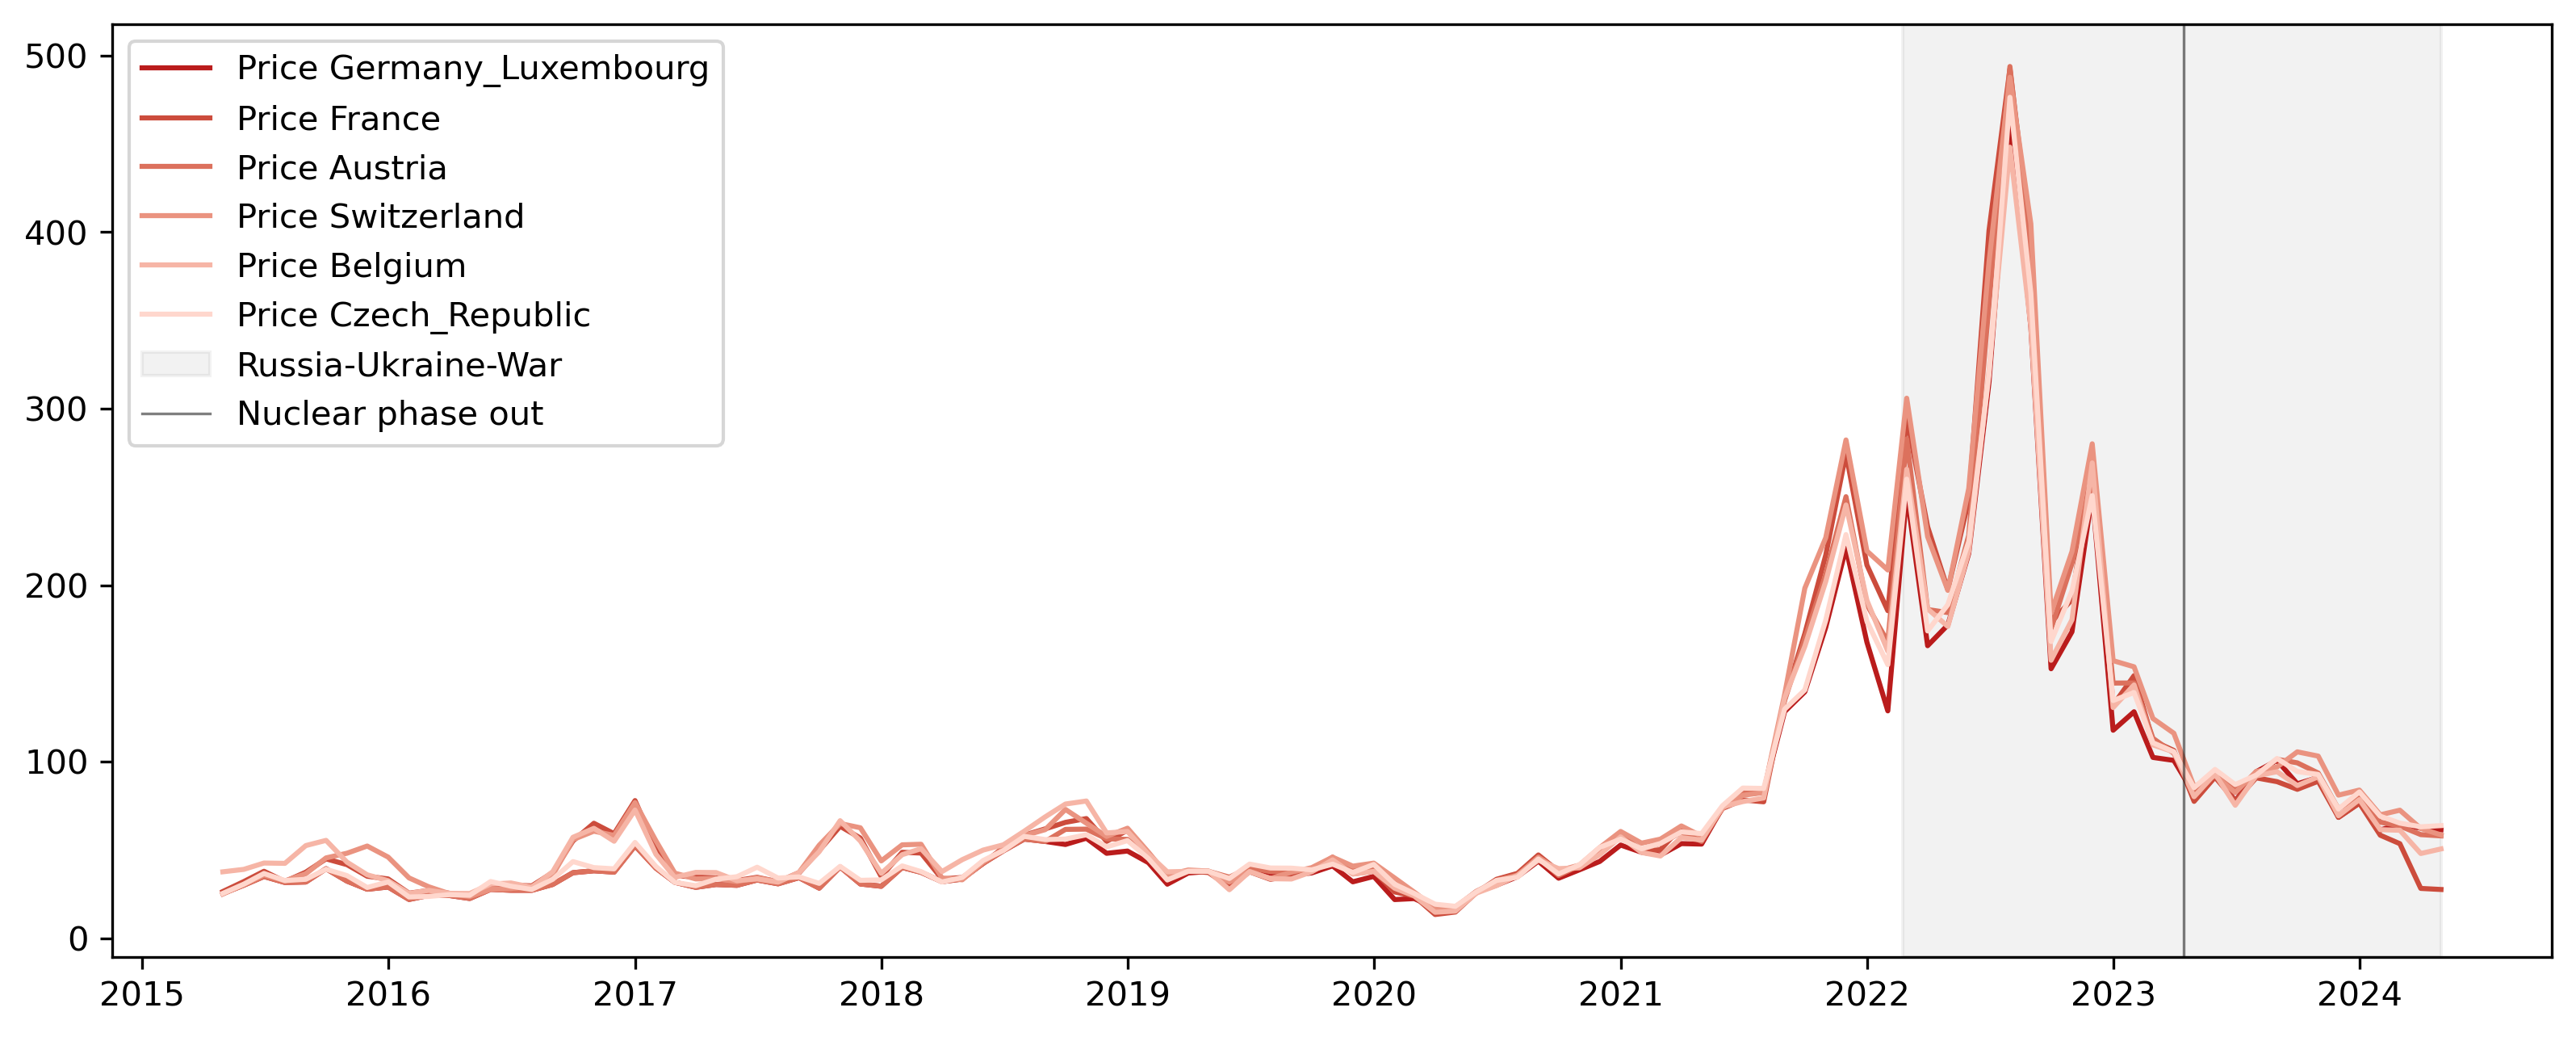

In [562]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_monthly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#ba1c1c')
plt.plot(Prices_FRA_monthly['France'], label = 'Price France',color='#cc4c3c')
plt.plot(Prices_Austria_monthly['Austria'], label = 'Price Austria', color='#dc715d')
plt.plot(Prices_Switzerland_monthly['Switzerland'], label = 'Price Switzerland', color='#ea9380')
plt.plot(Prices_Belgium_monthly['Belgium'], label = 'Price Belgium', color='#f6b5a6')
plt.plot(Prices_Czech_Republic_monthly['Czech_Republic'], label = 'Price Czech_Republic', color='#ffd7cd')

plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Prices_GER_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


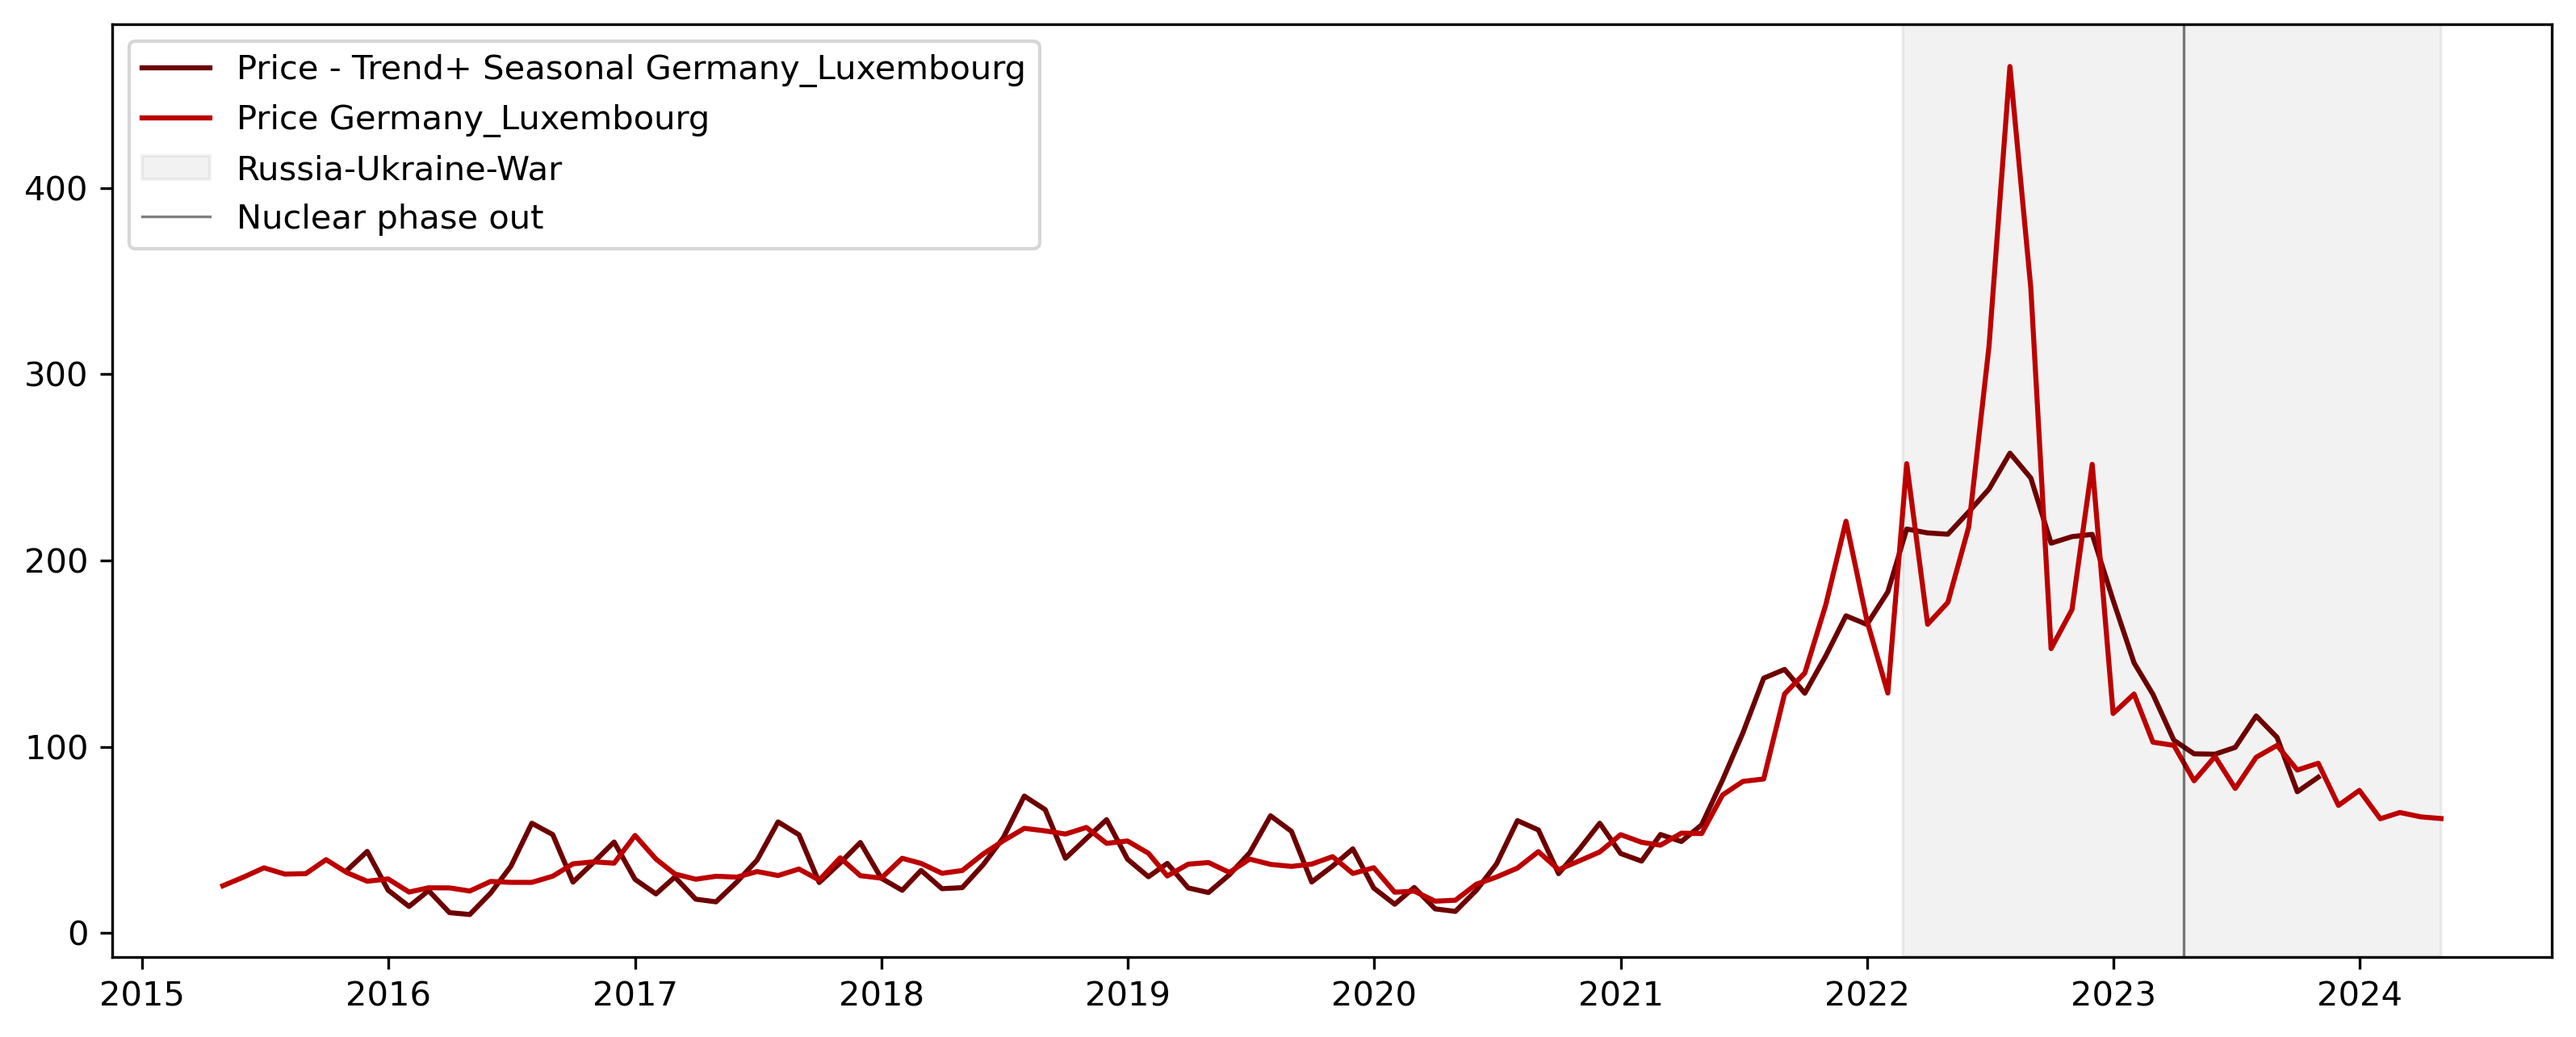

In [635]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_monthly['Trend+Seasonal'], label = 'Price - Trend+ Seasonal Germany_Luxembourg', color = '#6d0000')
plt.plot(Prices_GER_monthly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000')



plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Prices_GER_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')


plt.legend()
plt.show()

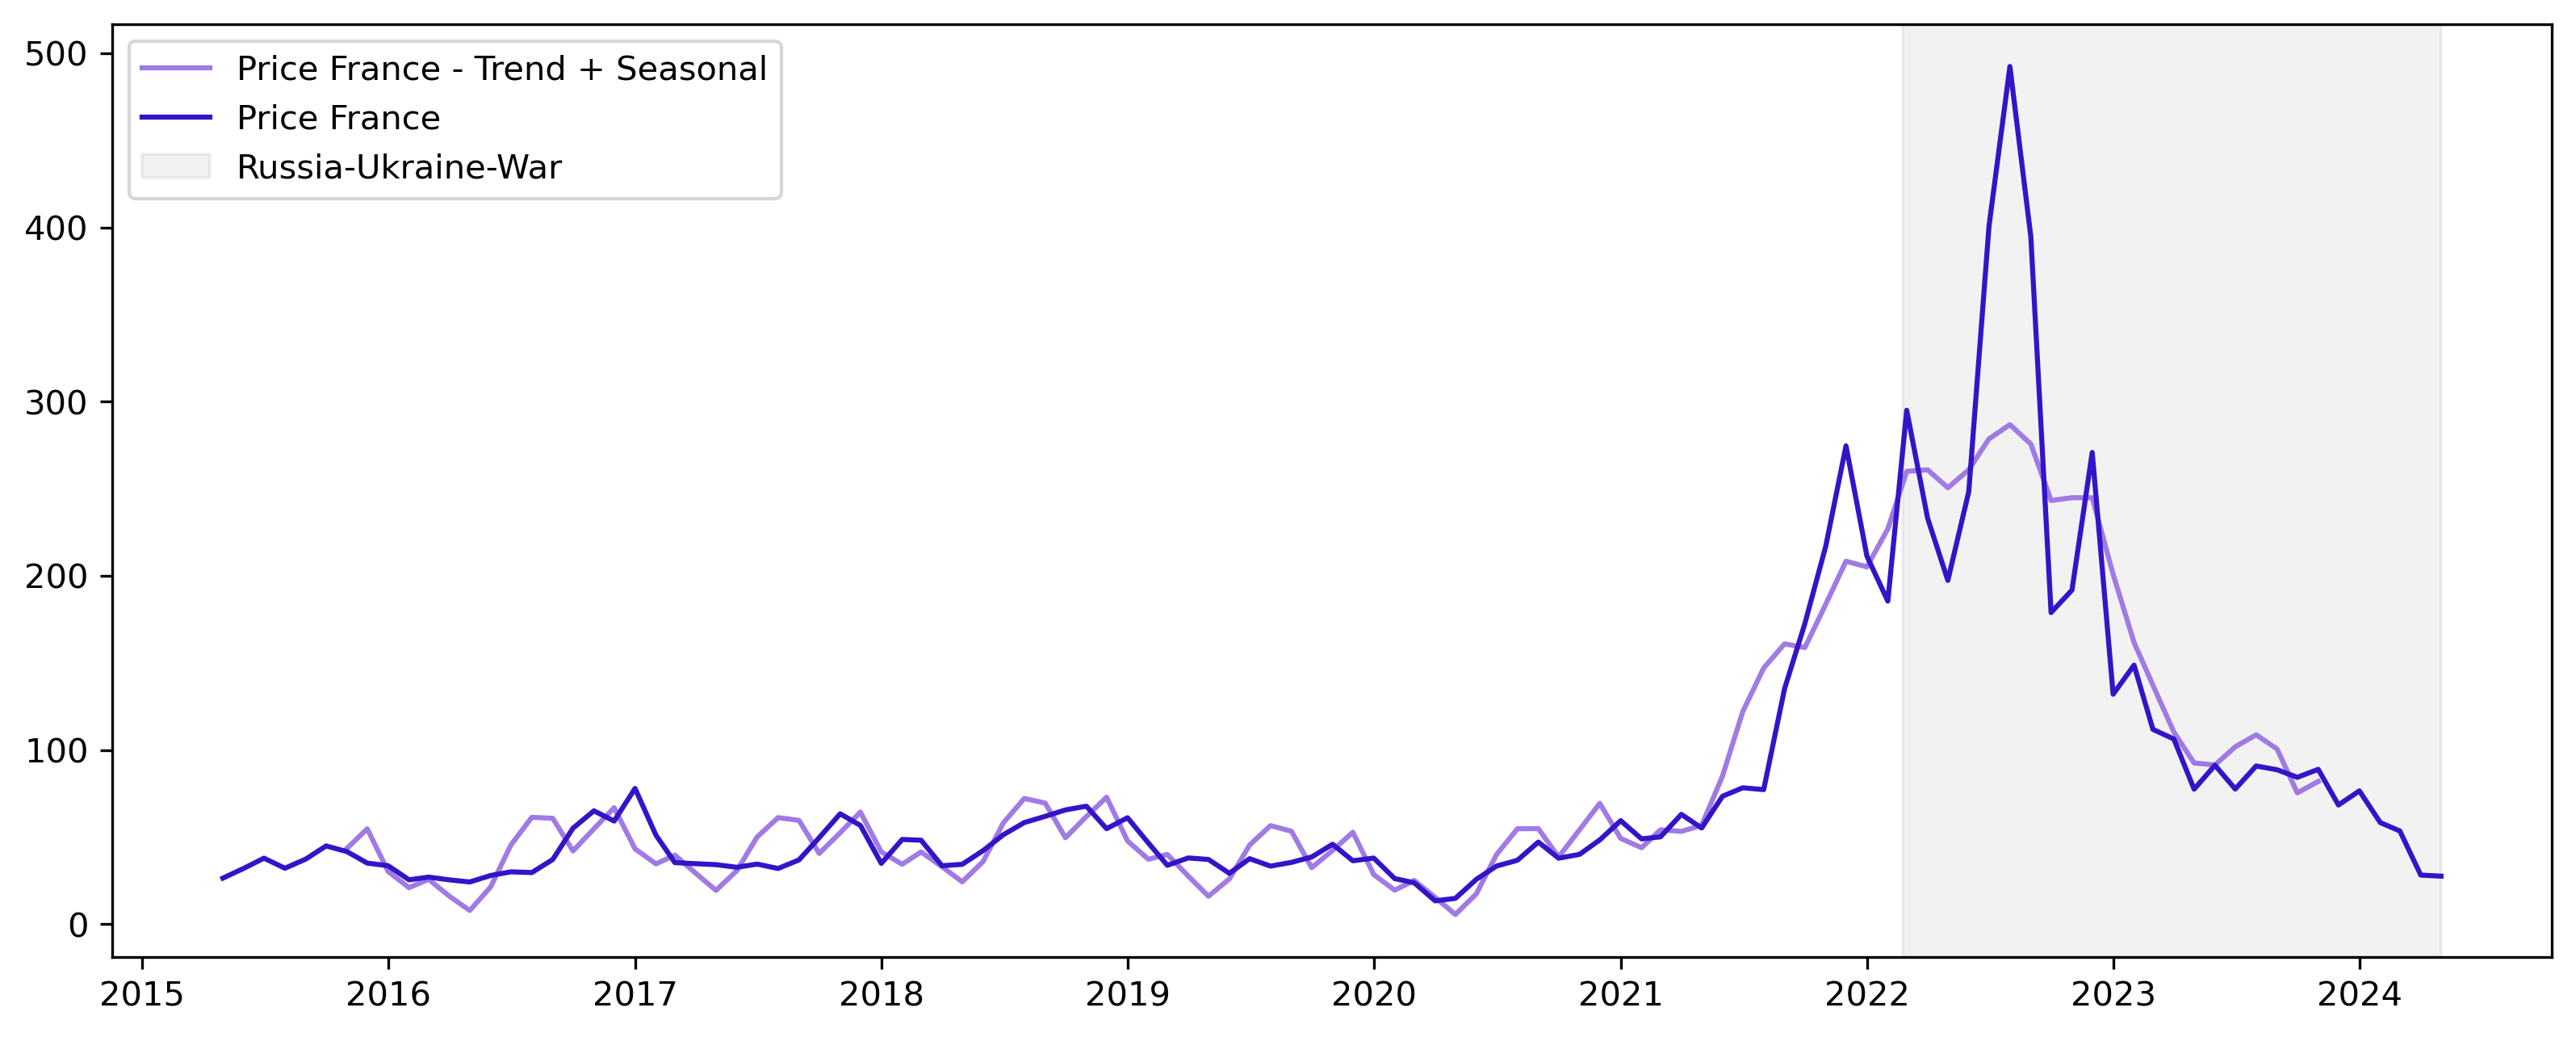

In [630]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_FRA_monthly['Trend+Seasonal'], label = 'Price France - Trend + Seasonal', color = '#a07ae5')
plt.plot(Prices_FRA_monthly['France'], label = 'Price France',color='#3314c9')




plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Prices_GER_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')


plt.legend()
plt.show()

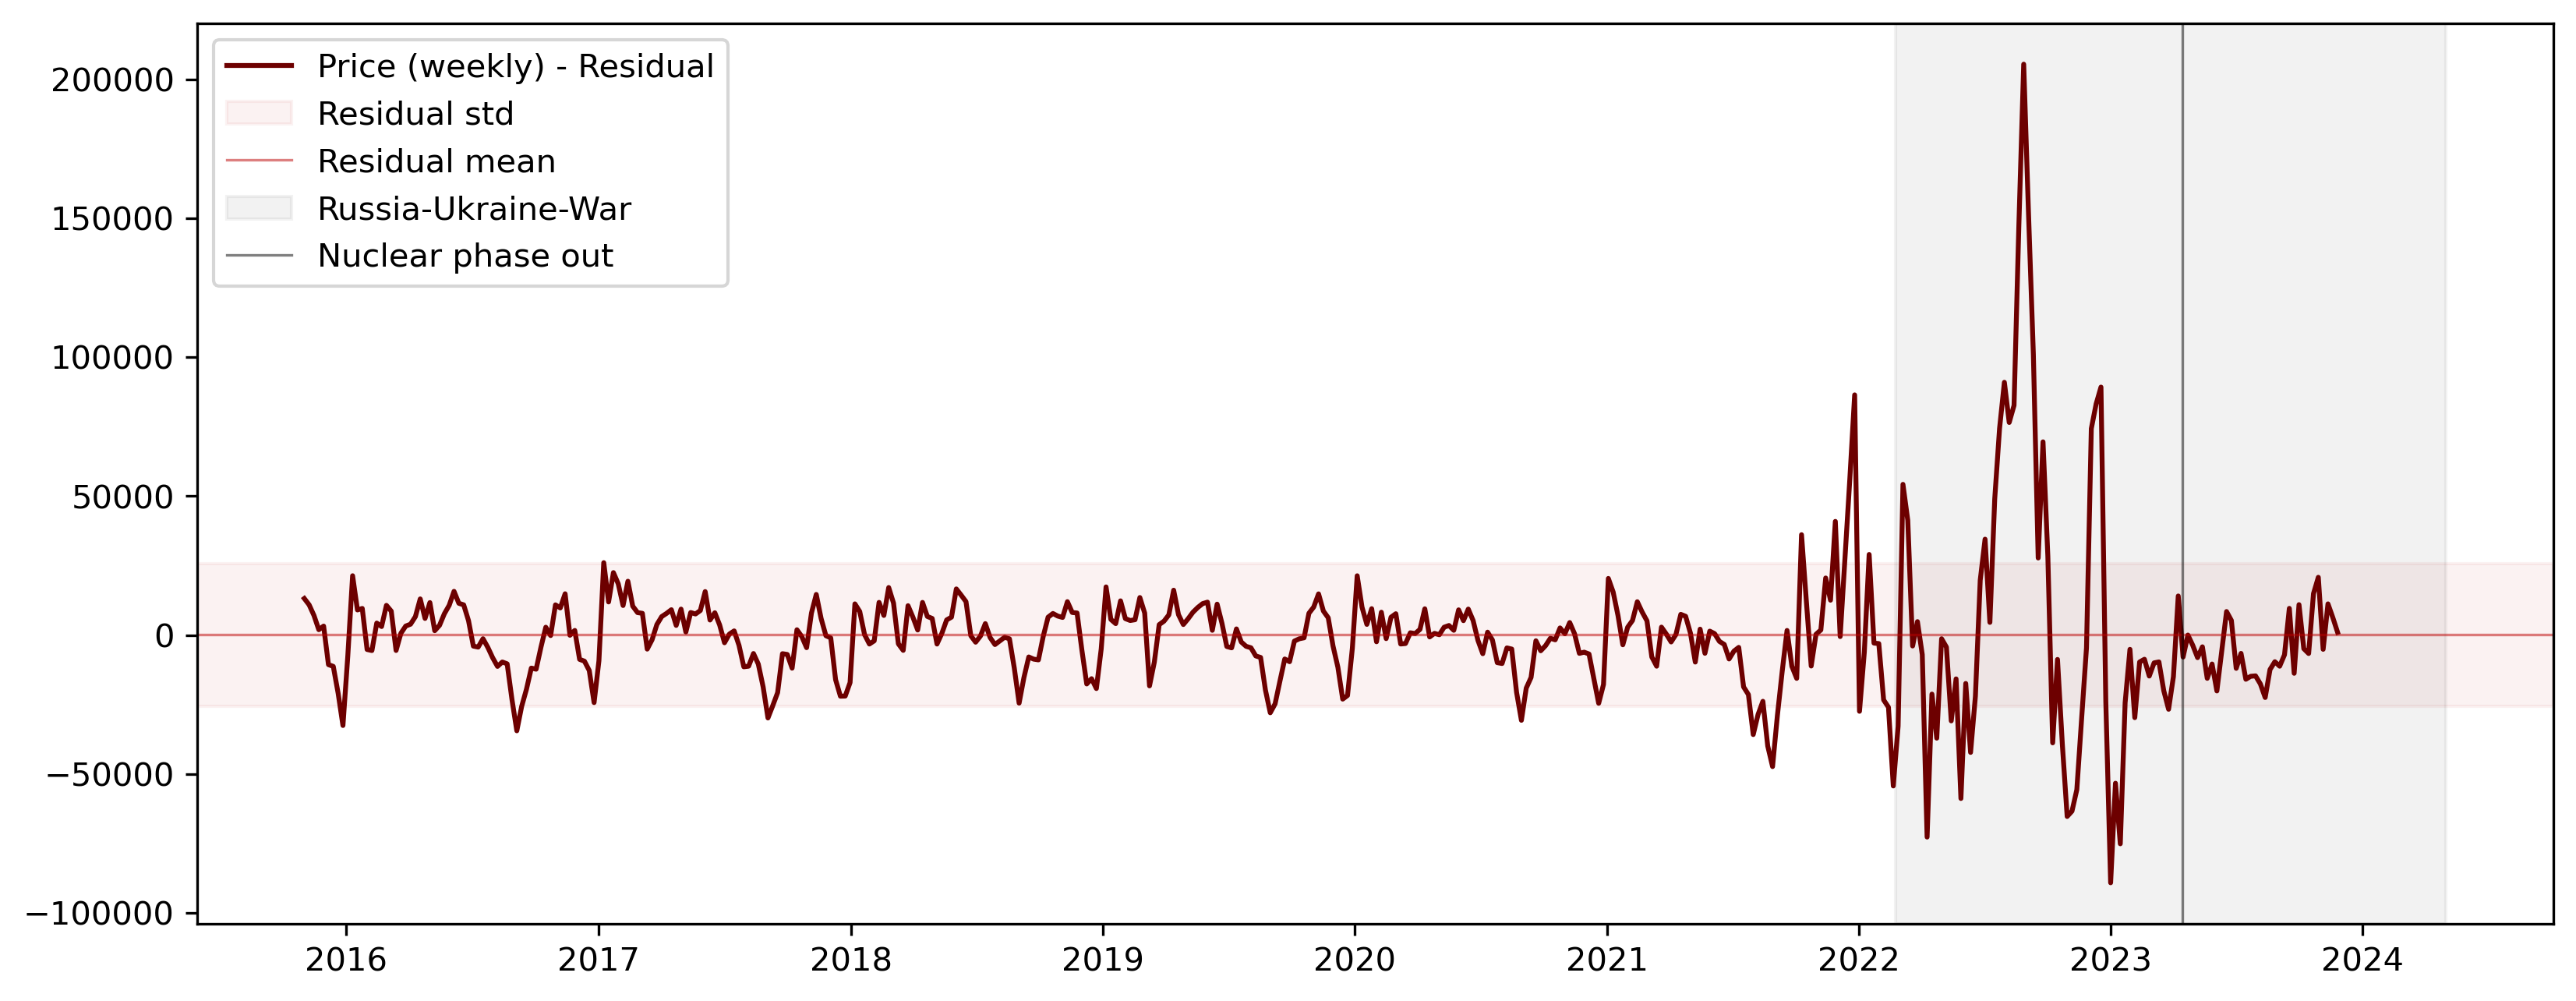

In [609]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual'], label = 'Price (weekly) - Residual', color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Consumption_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')

plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')

plt.legend()
plt.show()

In [566]:
print(f'mean_Prices_GER_monthly_residual: {mean_Prices_GER_monthly_residual}')
print(f'std_Prices_GER_monthly_residual: {std_Prices_GER_monthly_residual}')

mean_Prices_GER_monthly_residual: 0.22753992172815965
std_Prices_GER_monthly_residual: 31.635725204203595


### Generation + Import & Consumption + Export

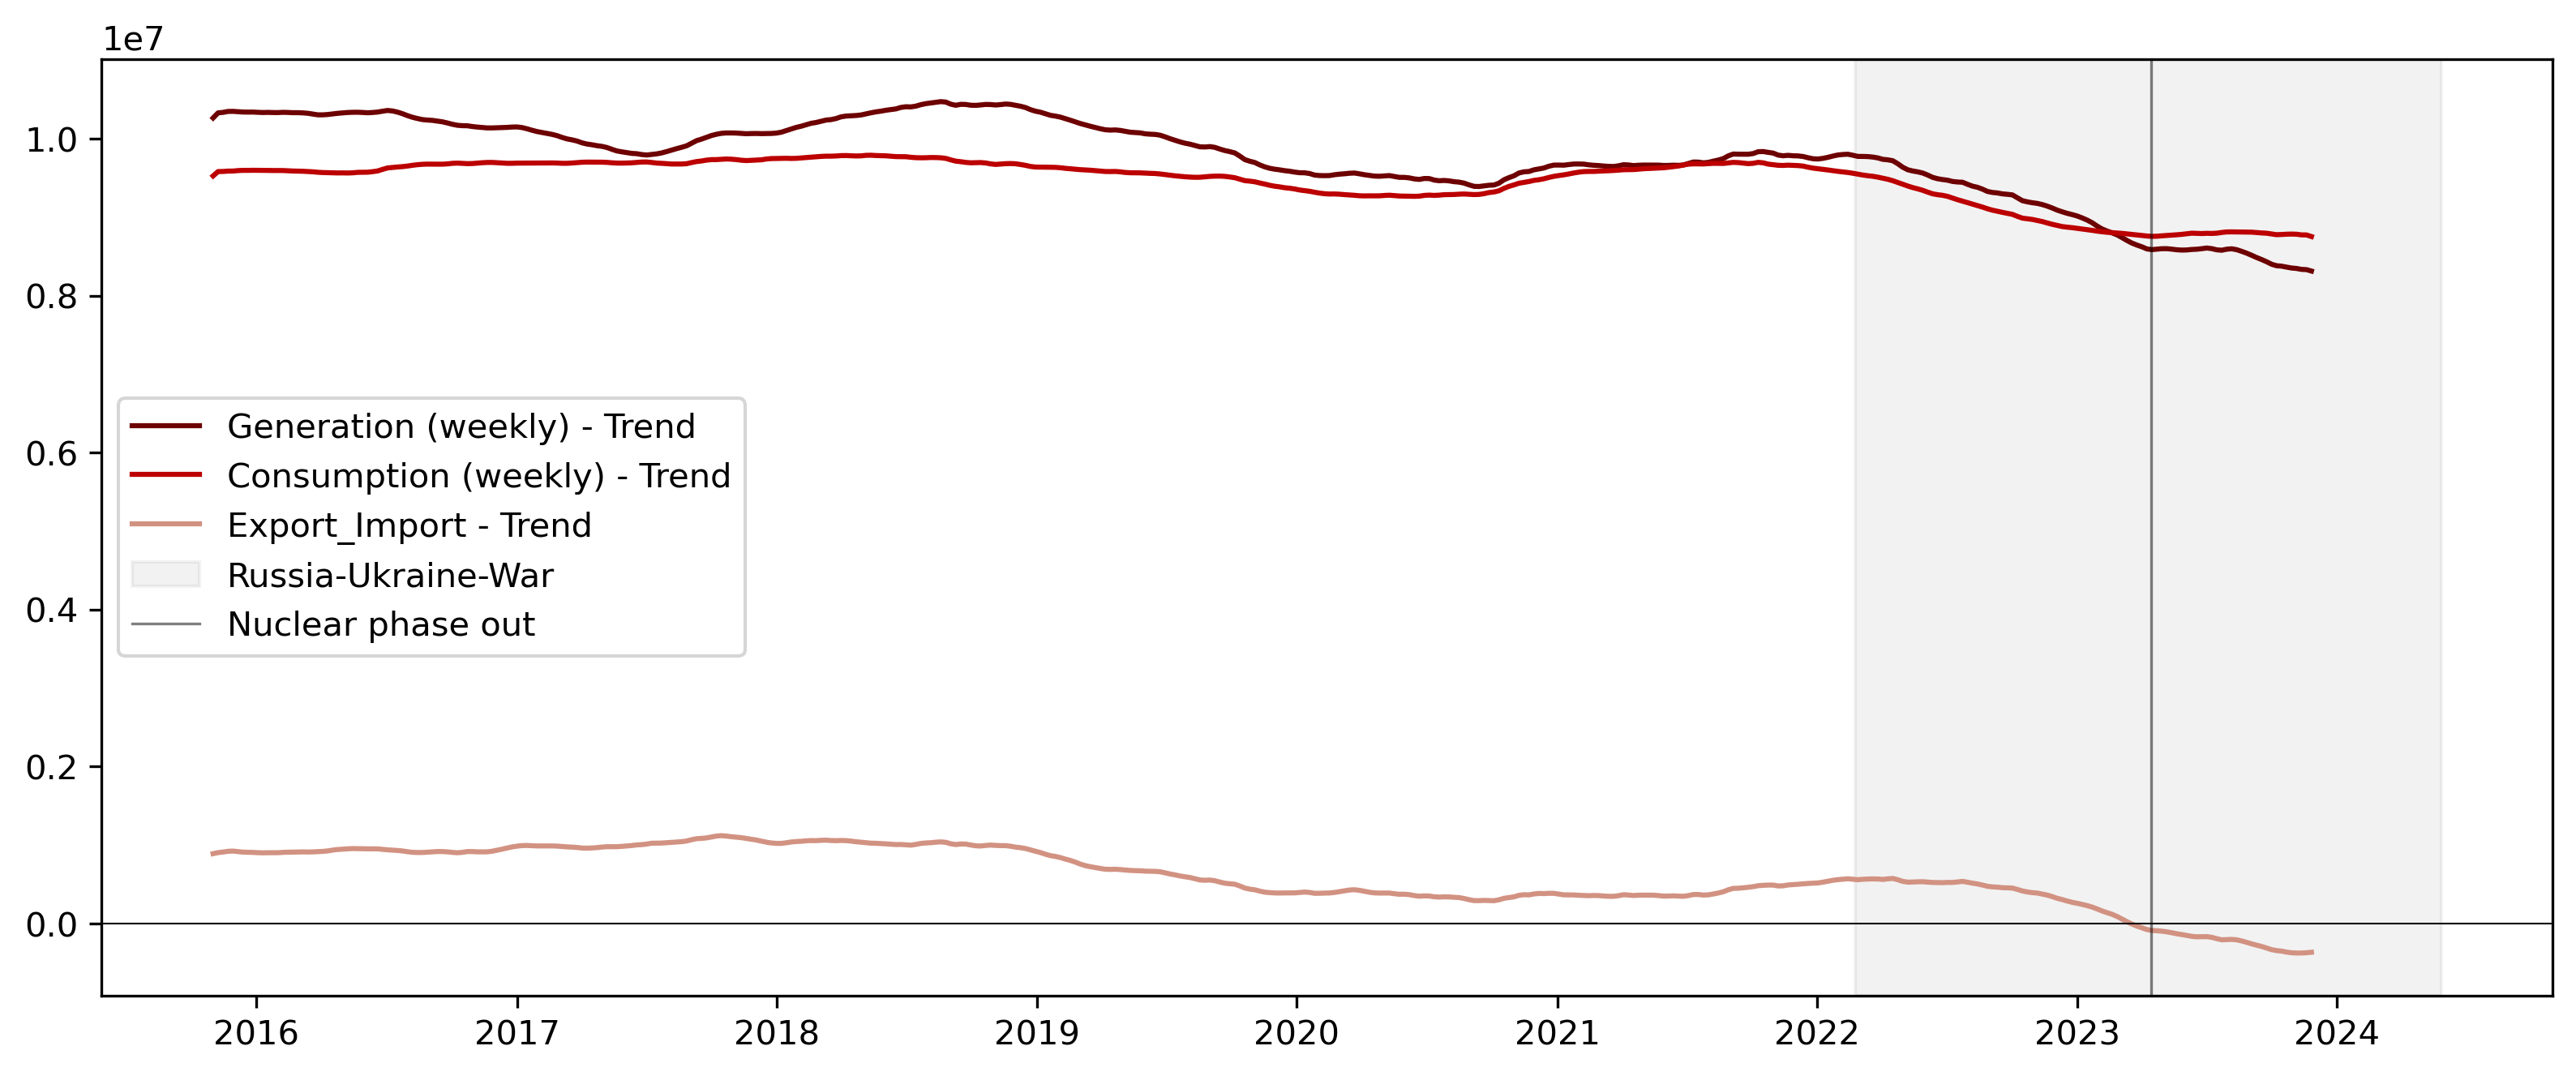

In [613]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Generation_weekly['Trend'], label = 'Generation (weekly) - Trend ', color = '#6d0000')
plt.plot(Consumption_weekly['Trend'], label = 'Consumption (weekly) - Trend',color='#bc0000')
plt.plot(Export_Import_weekly['Trend'], label = 'Export_Import - Trend', color = '#d29282')
plt.axhline(y=0,color = '#000000', linewidth = 0.5)
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Consumption_weekly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


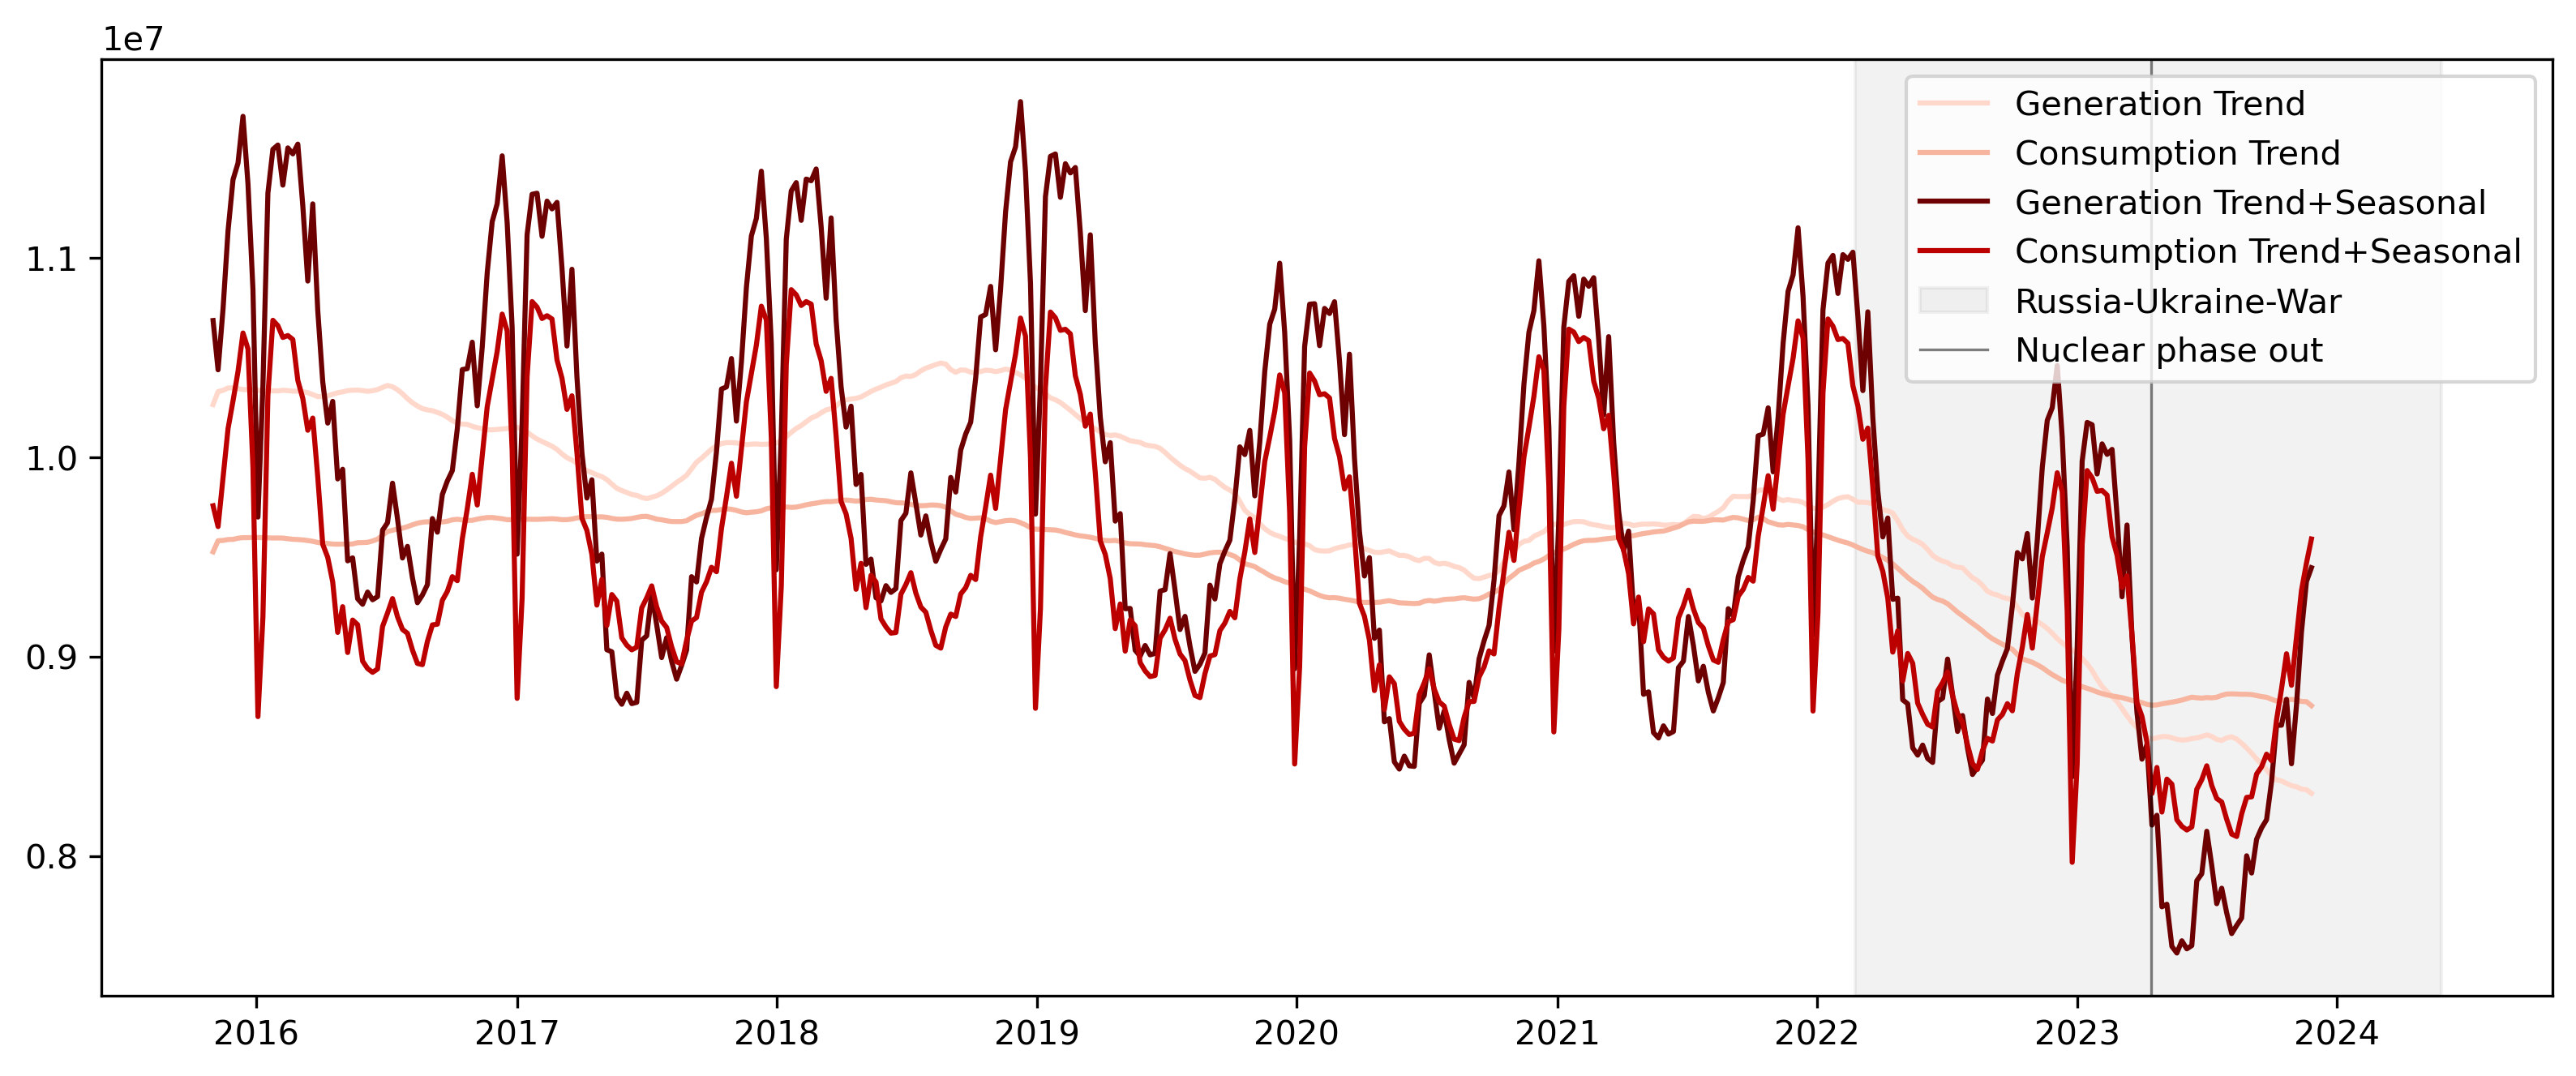

In [602]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Generation_weekly['Trend'], color= '#ffd8cb', label='Generation Trend')
plt.plot(Consumption_weekly['Trend'], color= '#f7b59f', label='Consumption Trend')
plt.plot(Generation_weekly['Trend+Seasonal'],color='#6d0000', label='Generation Trend+Seasonal')
plt.plot(Consumption_weekly['Trend+Seasonal'],color='#bc0000', label='Consumption Trend+Seasonal')


plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Consumption_weekly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

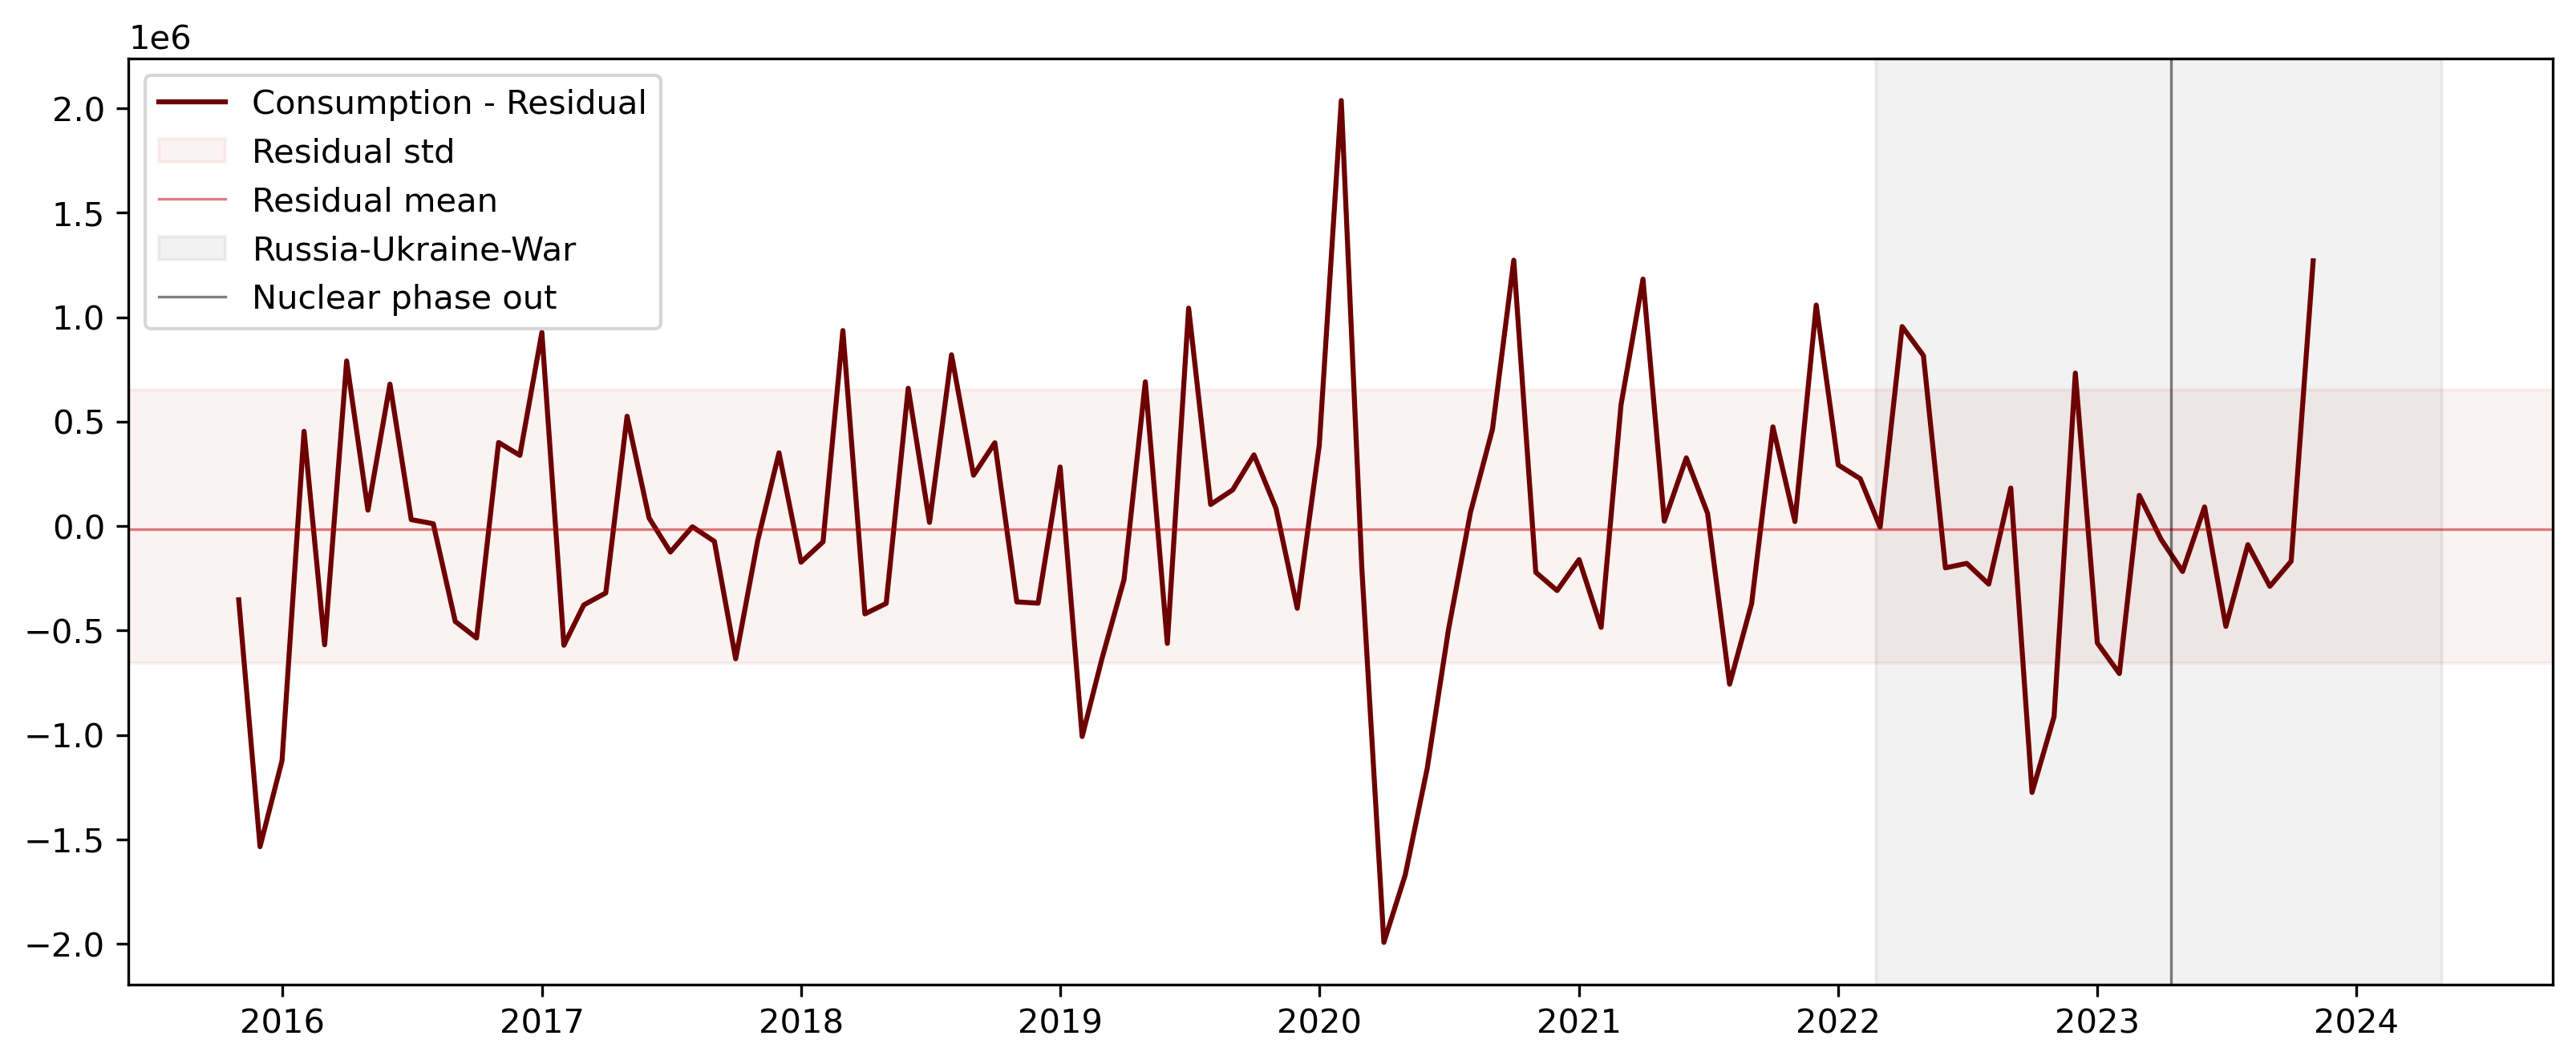

In [606]:
mean_Consumption_monthly_residual = np.mean(Consumption_monthly['Residual'])
std_Consumption_monthly_residual = np.std(Consumption_monthly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Consumption_monthly['Residual'], label = 'Consumption - Residual', color = '#6d0000')
plt.axhspan(ymin=-std_Consumption_monthly_residual,ymax=std_Consumption_monthly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Consumption_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Consumption_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')

plt.legend()
plt.show()

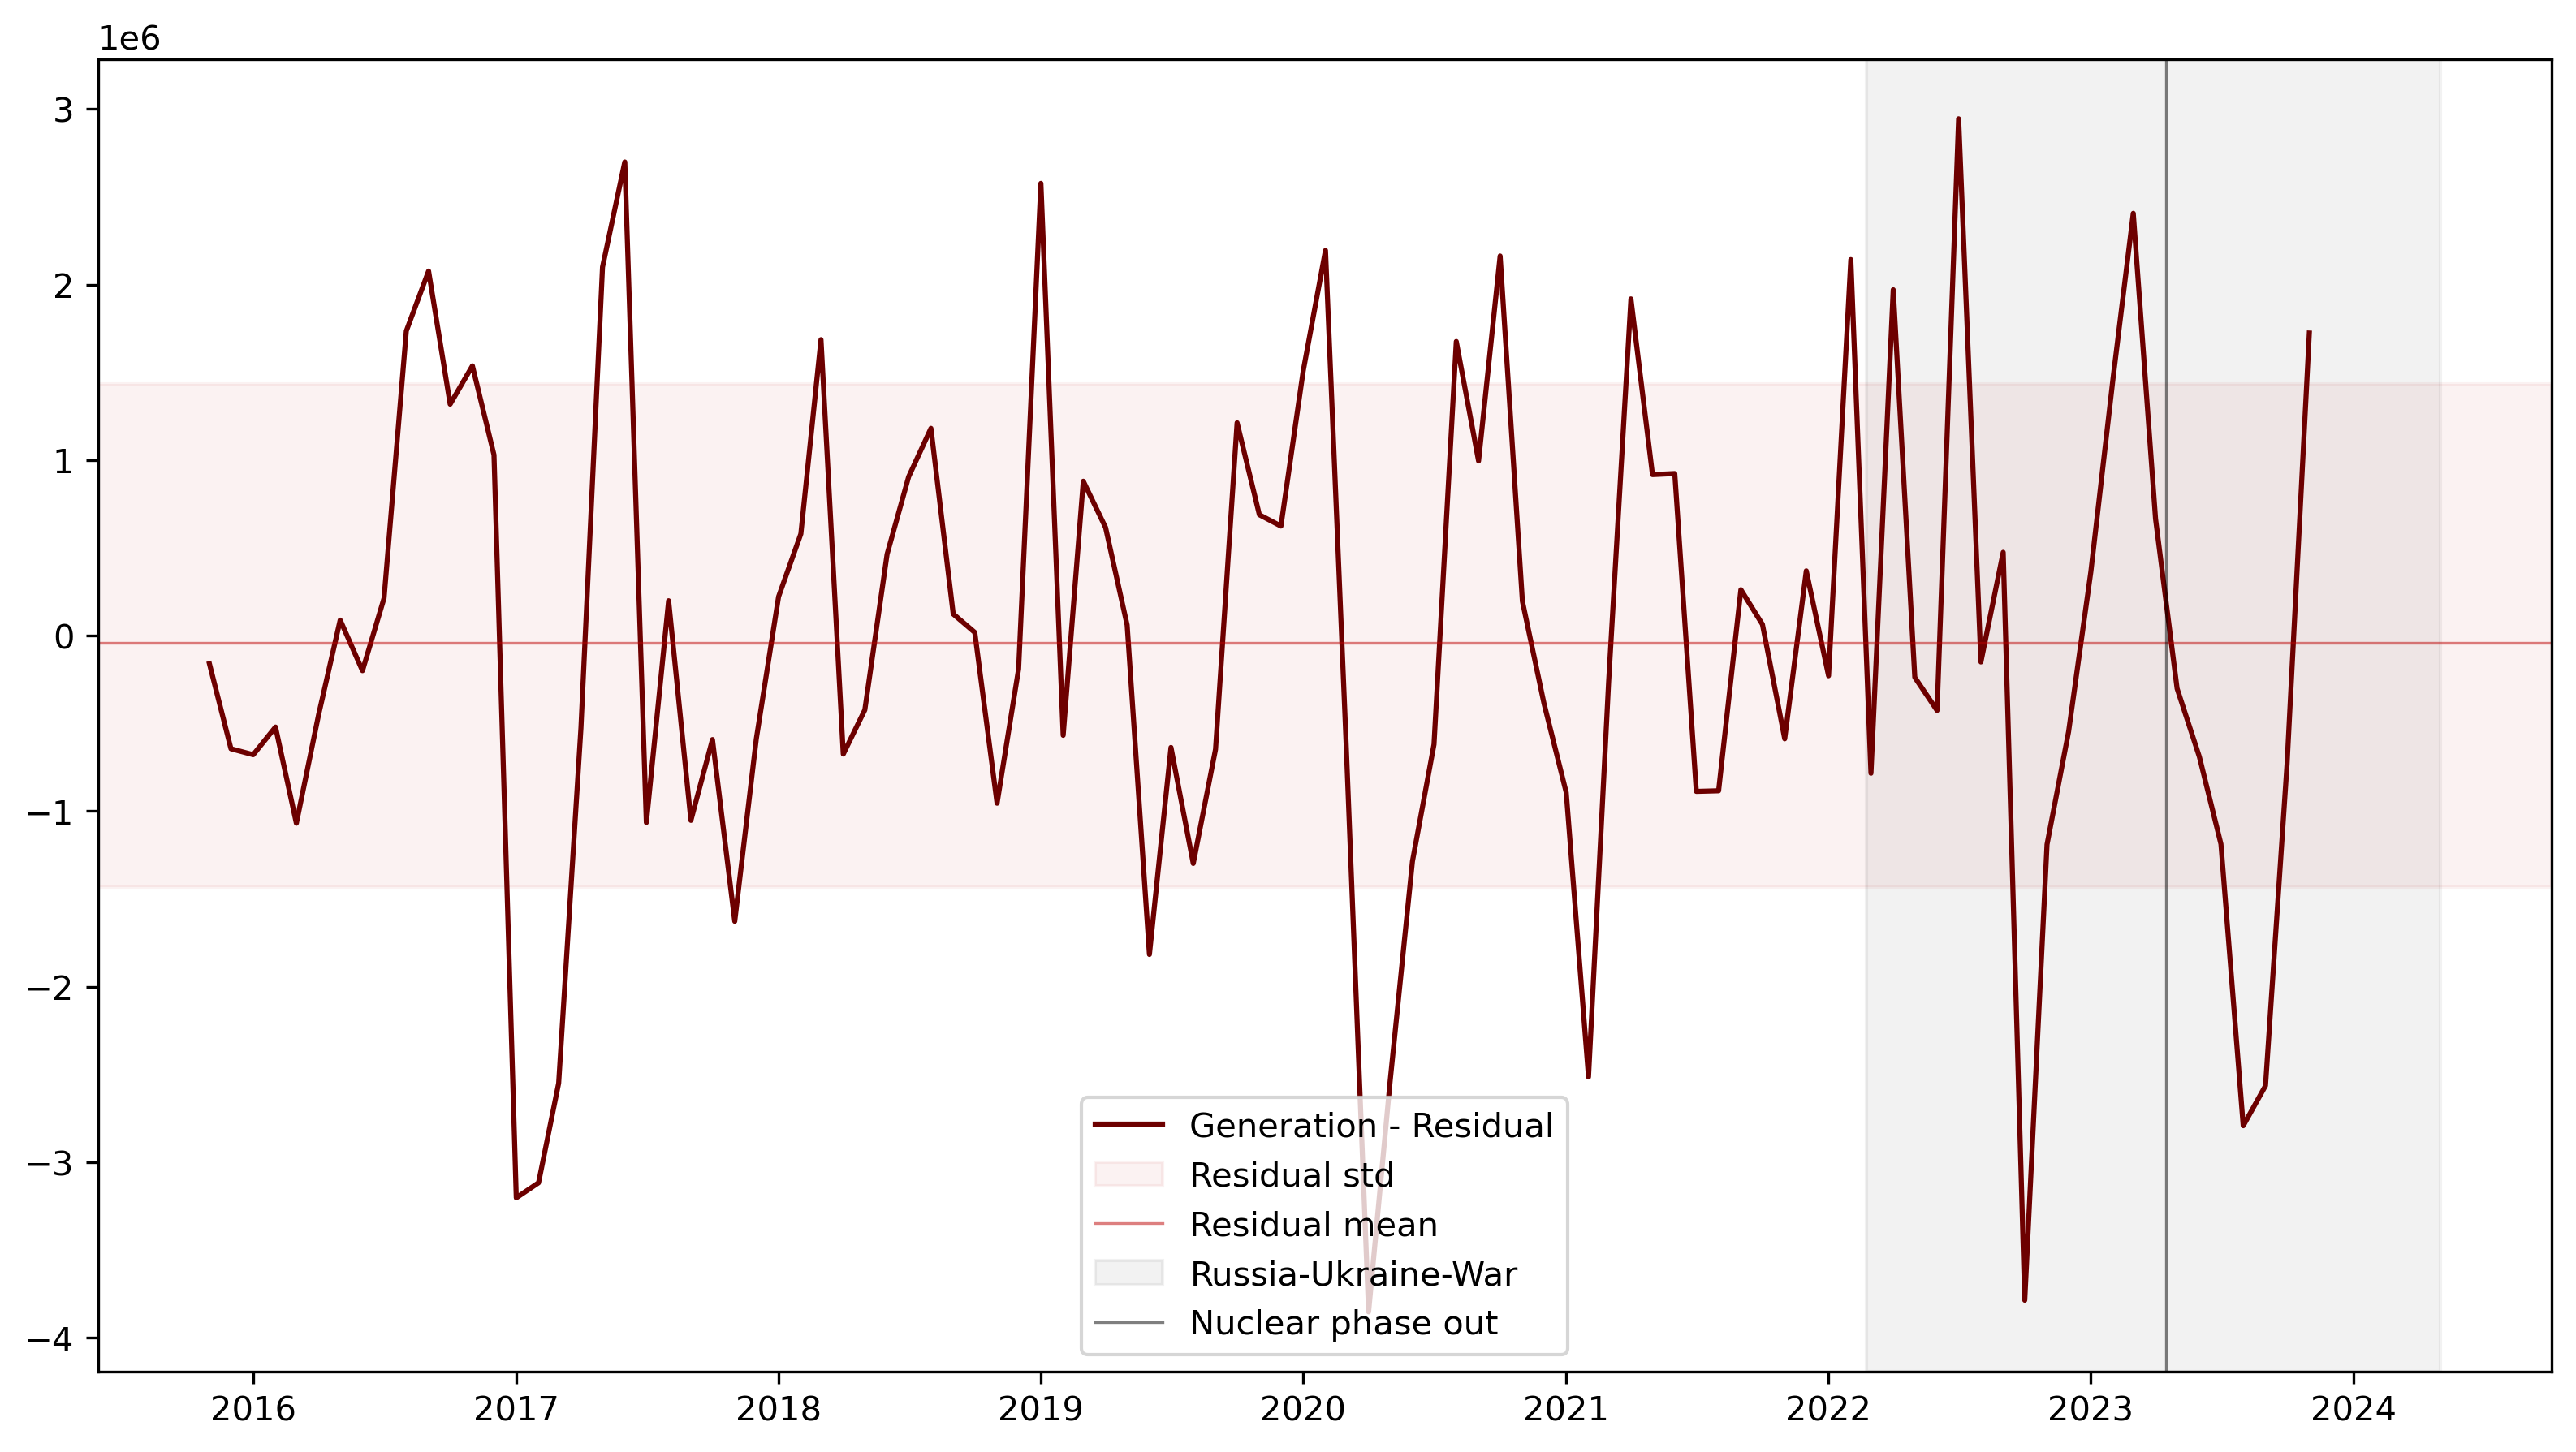

In [605]:
mean_Generation_monthly_residual = np.mean(Generation_monthly['Residual'])
std_Generation_monthly_residual = np.std(Generation_monthly['Residual'])


plt.figure(figsize= (13,7), dpi = 300)

plt.plot(Generation_monthly['Residual'], label = 'Generation - Residual', color = '#6d0000')
plt.axhspan(ymin=-std_Generation_monthly_residual,ymax=std_Generation_monthly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Generation_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Consumption_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')

plt.legend()
plt.show()

In [577]:
Import_reversed = Export_Import
Import_reversed['Import_sum'] = Import_reversed['Import_sum']* (-1) 

In [581]:
Export_monthly = decomposition_df(Export_Import, 'Export_sum')
Import_monthly = decomposition_df(Import_reversed, 'Import_sum')
Export_weekly = decomposition_df(Export_Import, 'Export_sum','W')
Import_weekly = decomposition_df(Import_reversed, 'Import_sum','W')


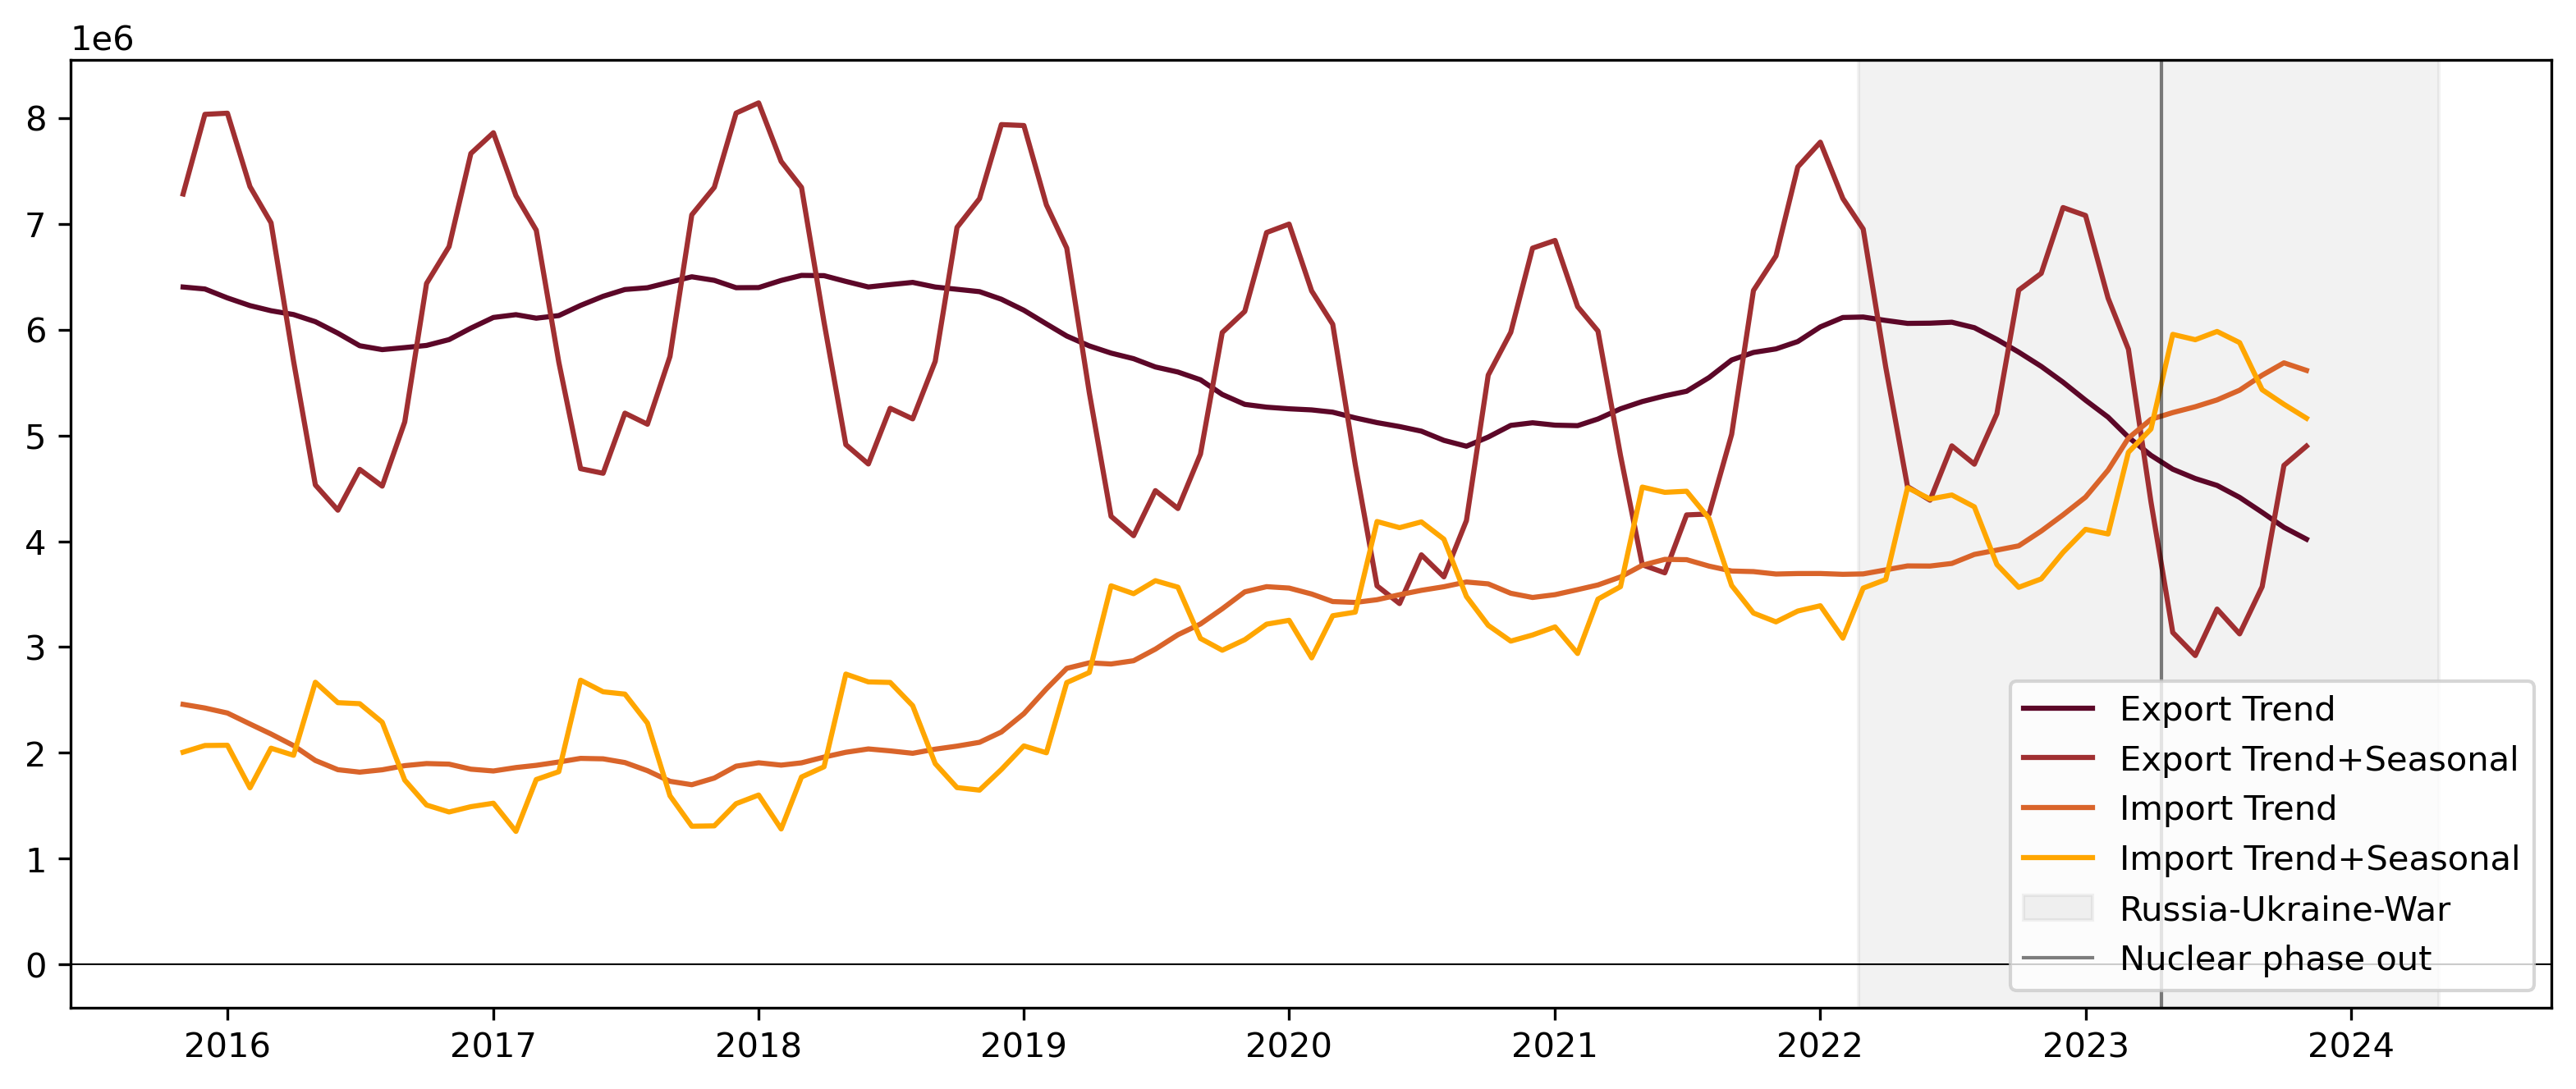

In [617]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_monthly['Trend'], color= '#5c0728', label='Export Trend')
plt.plot(Export_monthly['Trend+Seasonal'],color='#a02f31', label='Export Trend+Seasonal')
plt.plot(Import_monthly['Trend'], color= '#d9642a', label='Import Trend')
plt.plot(Import_monthly['Trend+Seasonal'],color='#ffa600', label='Import Trend+Seasonal')



plt.axhline(y=0,color = '#000000', linewidth = 0.5)
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Export_monthly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = 1,  label = 'Nuclear phase out')
plt.legend()
plt.show()

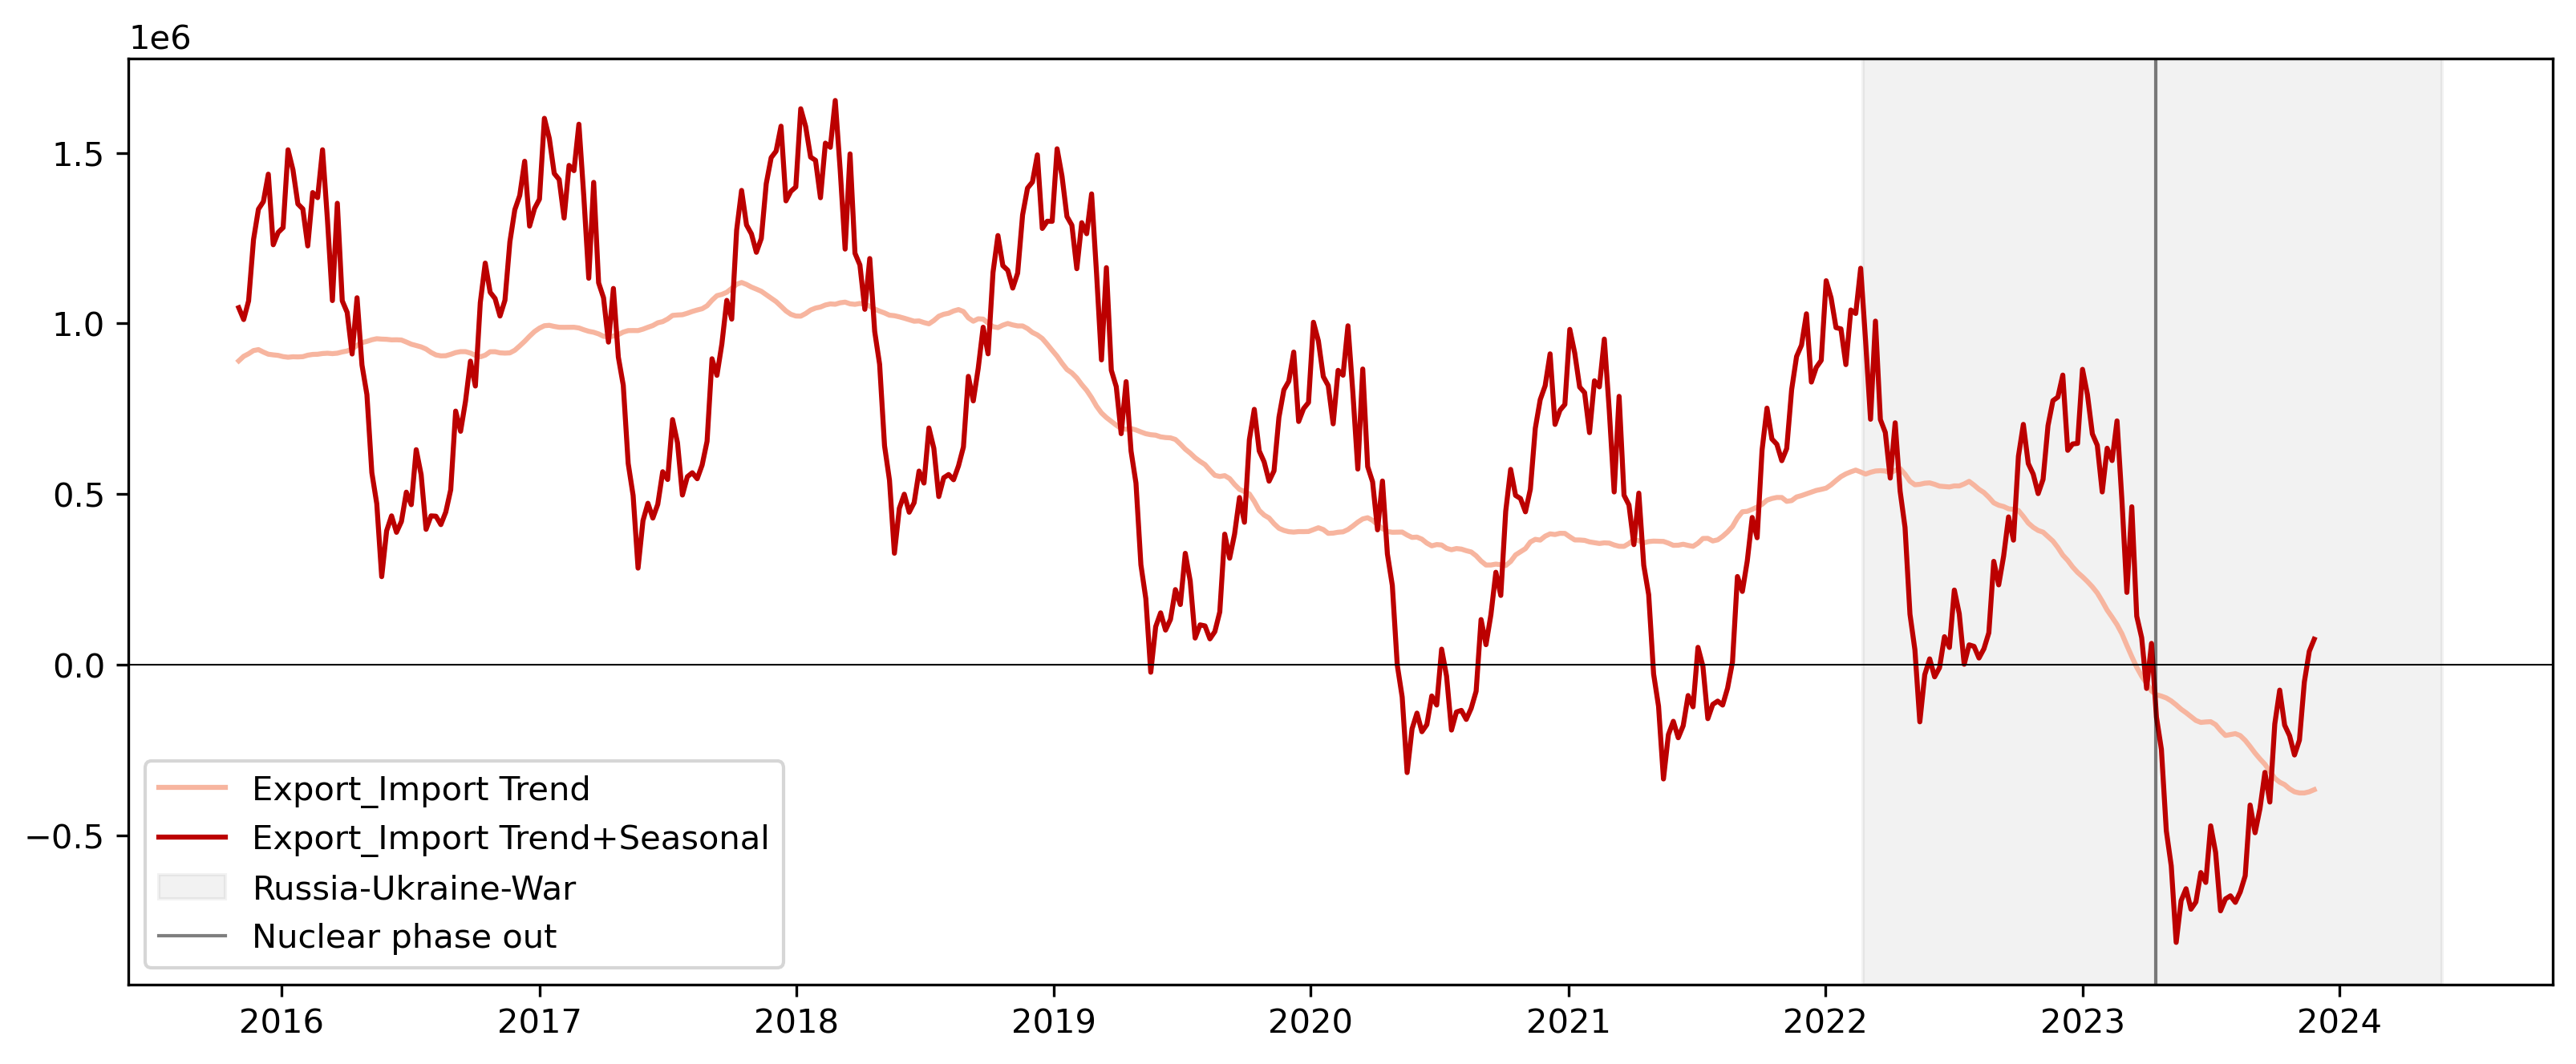

In [620]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_Import_weekly['Trend'], color= '#f7b59f', label='Export_Import Trend')
plt.plot(Export_Import_weekly['Trend+Seasonal'],color='#bc0000', label='Export_Import Trend+Seasonal')

plt.axhline(y=0,color = '#000000', linewidth = 0.5)
plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Export_Import_weekly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = 1,  label = 'Nuclear phase out')
plt.legend()
plt.show()

Split of the data in normal and unnormal phases

Das hier noch in genauer nur für den interessanten Zeitraum

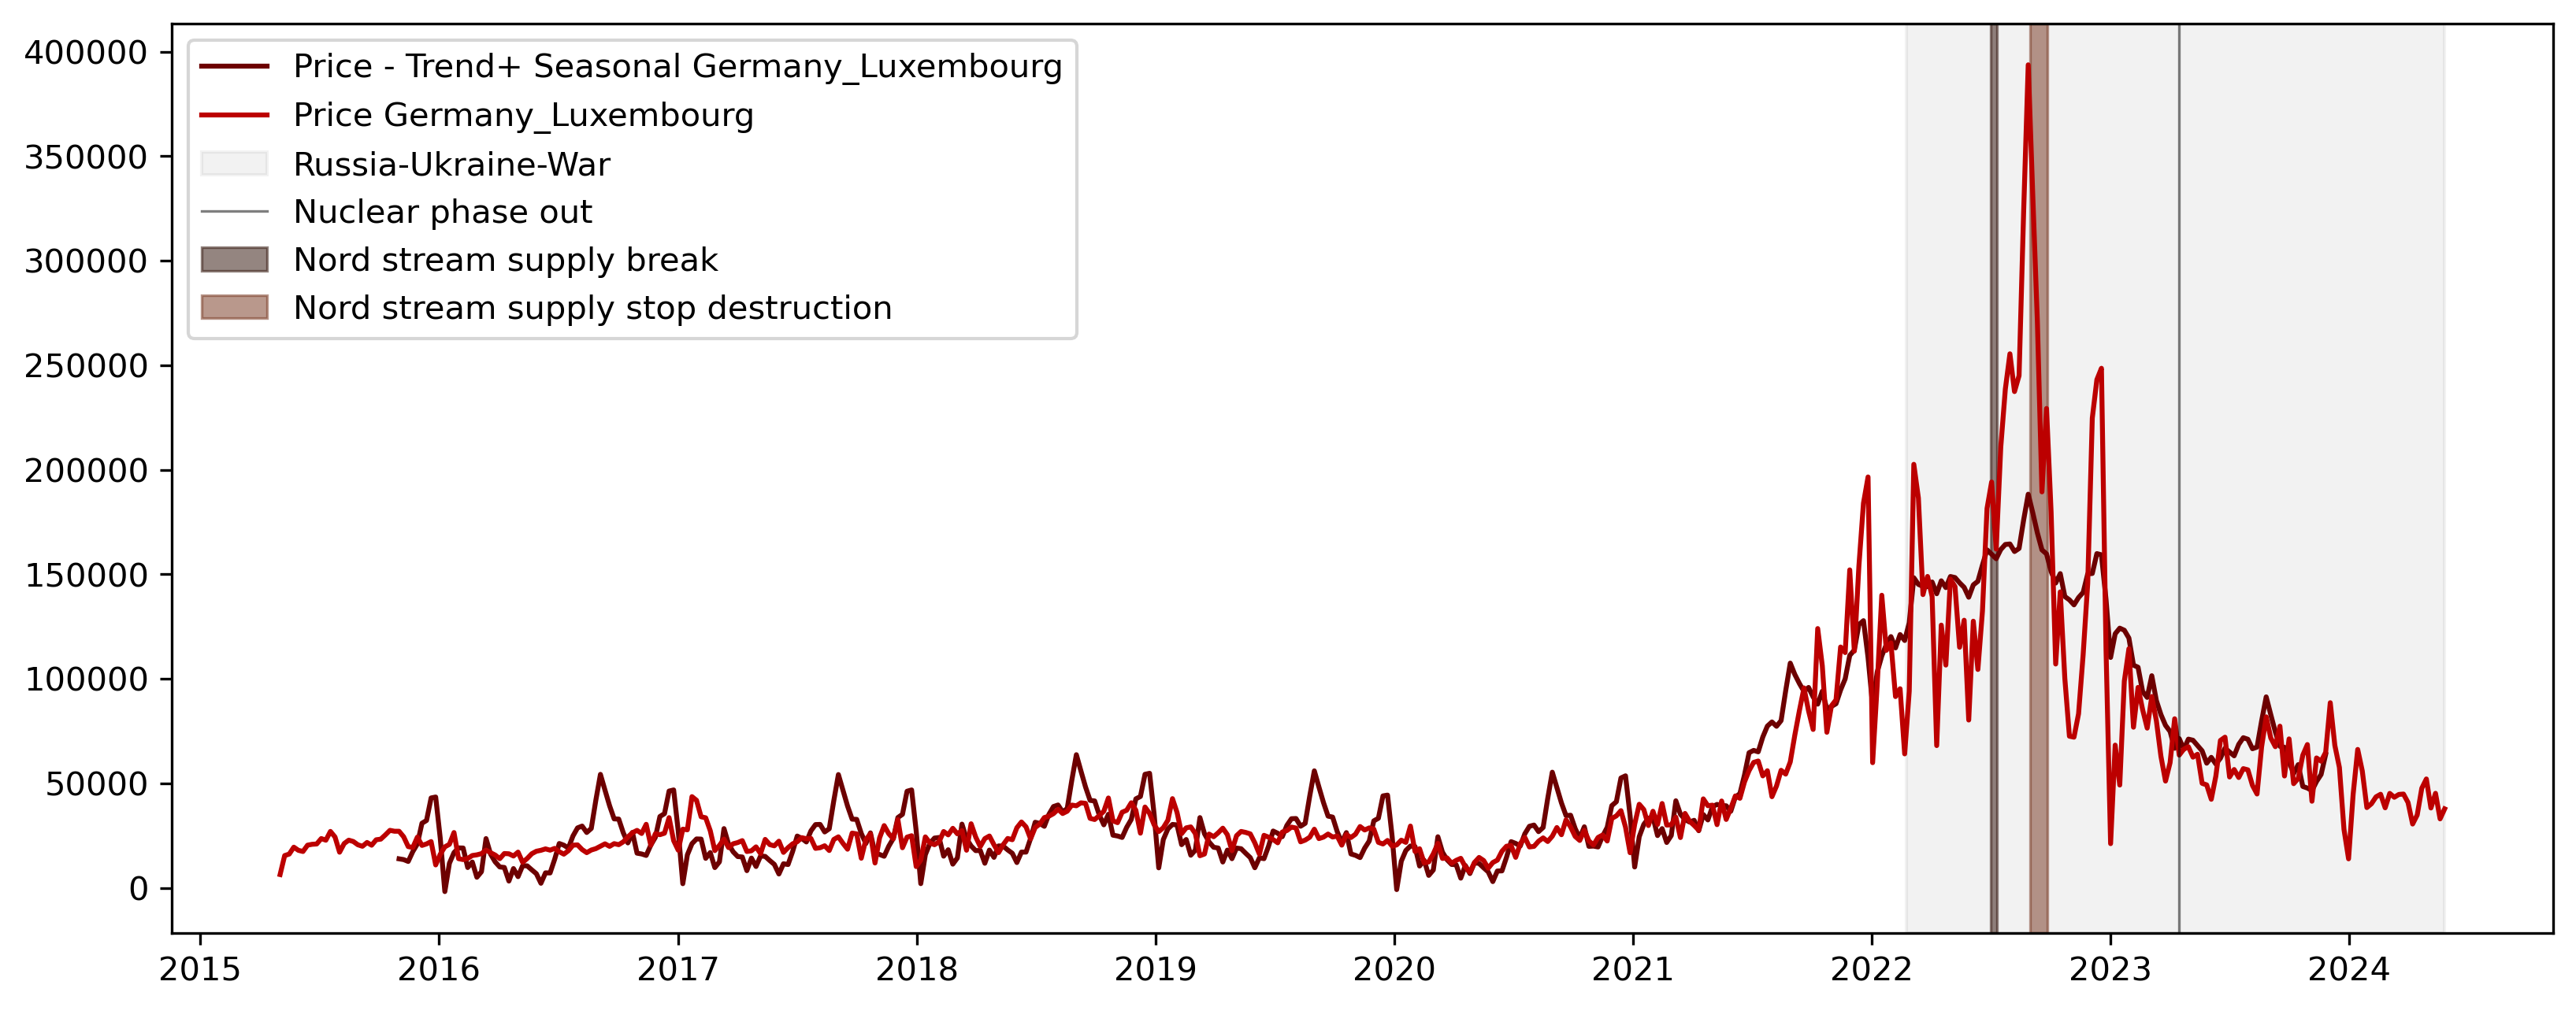

In [633]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal'], label = 'Price - Trend+ Seasonal Germany_Luxembourg', color = '#6d0000')
plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000')



plt.axvspan(xmin= dt.datetime(2022,2,23,0,0,0),xmax= Prices_GER_weekly.index.max(), alpha = 0.05, label = 'Russia-Ukraine-War',color = '#000000')
plt.axvline(x=dt.datetime(2023,4,15),color = '#000000', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.axvspan(xmin=dt.datetime(2022,7,11),xmax=dt.datetime(2022,7,2),color = '#2b0c03', alpha = .5, linewidth = .8,  label = 'Nord stream supply break')
plt.axvspan(xmin=dt.datetime(2022,8,31),xmax=dt.datetime(2022,9,26),color = '#74321b', alpha = .5, linewidth = .8,  label = 'Nord stream supply stop destruction')

plt.legend()
plt.show()

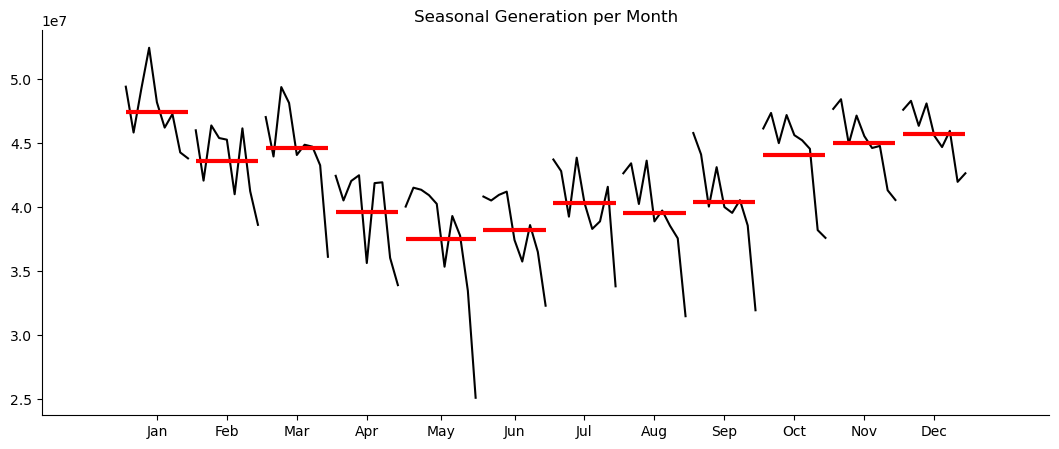

In [522]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(13, 5))

# create the seasonal plot
month_plot(Generation_monthly['Generation_sum'], ax=plt.gca())
plt.title("Seasonal Generation per Month")
# plt.hlines(y=28, xmin = 0, xmax = 260, colors='blue')
# month_plot(fb_search['facebook: (United Kingdom)'], ax=plt.gca())

sns.despine()
plt.show()

In [44]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


In [384]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

fig.add_trace(
        go.Scatter(x=Generation_daily.index, y=Generation_daily['Generation_sum'], line= dict(color= '#bc5090'), name = 'Generation'),
        row=1,
        col=1 
        )
fig.add_trace(
        go.Scatter(x=Consumption_daily.index, y=Consumption_daily['Total_sum'],line= dict(color= '#003f5c'), name = 'Consumption'),
        row=1,
        col=1
        )

for i, col in enumerate(cols):
        fig.add_trace(
        go.Scatter(x=Generation_daily.index, y=Generation_daily[col], line= dict(color= '#bc5090'), name = 'Generation'),
        row=i+2,
        col=1 
        )
        fig.add_trace(
        go.Scatter(x=Consumption_daily.index, y=Consumption_daily[col],line= dict(color= '#003f5c'), name = 'Consumption'),
        row=i+2,
        col=1
        )
 

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

In [74]:
Total_Consumption_monthly['Trend+Seasonal'] = Total_Consumption_monthly['Trend']+Total_Consumption_monthly['Seasonal']
Total_Consumption_monthly_Residual_Trend = Total_Consumption_monthly['Trend']+Total_Consumption_monthly['Residual']

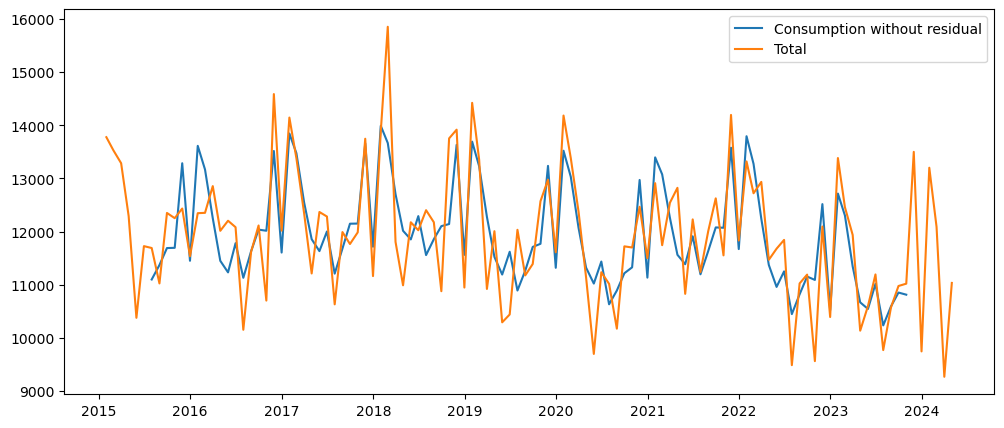

In [69]:
cols = ['Total_sum', "Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
        fig.add_trace(
        go.Scatter(x=Prices_monthly.index, y=Prices_monthly[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

In [72]:
Prices_monthly['Trend+Seasonal'] = Prices_monthly['Trend']+Prices_monthly['Seasonal']

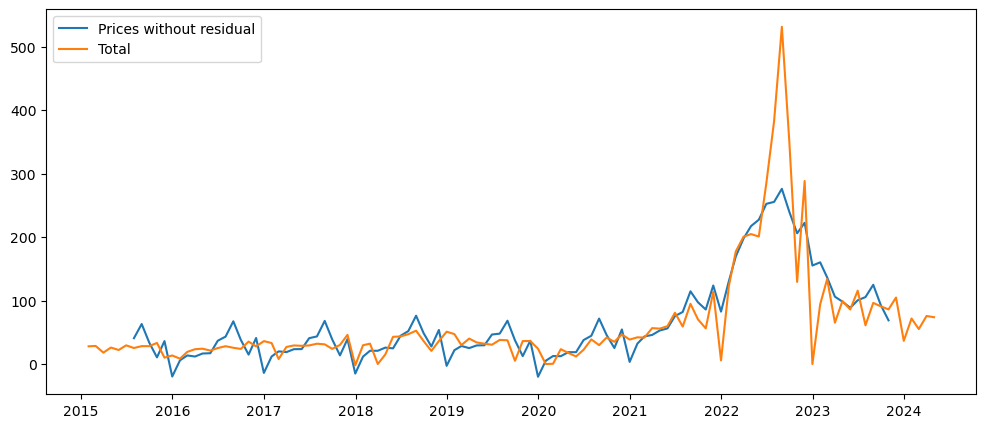

In [79]:
plt.figure(figsize= (12,5))

plt.plot(Prices_monthly['Trend+Seasonal'], label = 'Prices without residual')
plt.plot(Prices_monthly['Germany_Luxembourg'], label = 'Total')
# plt.plot(Total_Consumption_monthly_Residual_Trend, label= 'Trend + Residual')


plt.legend()
plt.show()

In [42]:
fig = px.line(Total_Consumption, x=Total_Consumption.index, y="Total",)
fig.update_layout(
    yaxis_title="Consumption in MWh", 
    xaxis_title="Year",
    legend_title="", 
    title="Monthly Total Consumption"
)
fig.show()

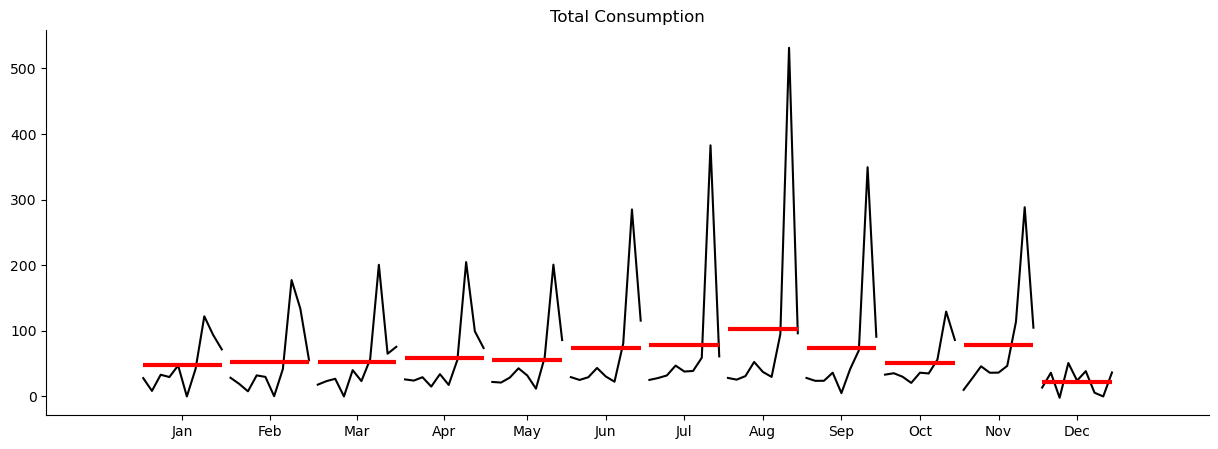

In [61]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(15, 5))

# create the seasonal plot
# month_plot(Total_Consumption_monthly['Total'], ax=plt.gca())
#month_plot(Total_Generation_monthly['Sum'], ax = plt.gca())
month_plot(Prices_monthly['Germany_Luxembourg'], ax = plt.gca())
plt.title("Total Consumption")


sns.despine()
plt.show()